#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>TUTORIALS</font>

### Setup

In [141]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue, and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))
 

unknownfreq1 = 3
unknownmag1 = 5
unknownphase1 =np.pi/4
unknownfreq2 = 2
unknownmag2 = 3
unknownphase2 =np.pi/2
unknownfreq3 = 4
unknownmag3 = 8
unknownphase3 =np.pi/6
unknownfreq4 = 5
unknownmag4 = 4
unknownphase4 = 2*np.pi 

## <font color=red>DSP.05.T1) Spatial Patterns: Multiplying Sine Waves of the Same Frequency but Different Phase</font>

### <font color=red>DSP.05.T1.a) Multiplying Sine Waves to Create a Spatial Series</font>

Create a spatial pattern with a 10-cycle frequency on one axis and a 5-cycle frequency on the other
axis.

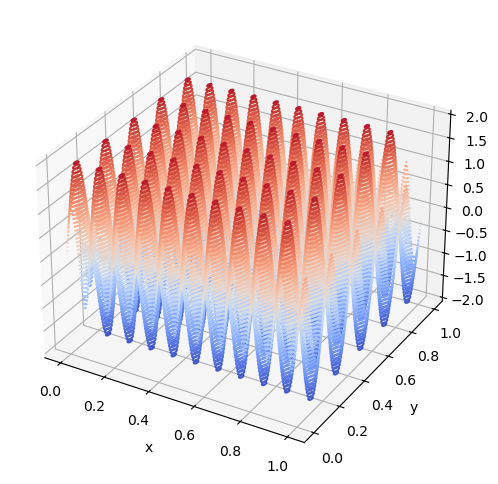

In [142]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X) + np.sin(2*np.pi * 5 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Count 10 peaks in one direction and 5 peaks in the other direction.

Stop and think a moment: we just switched from talking about cycles in time to cycles in space. Did you
notice that our code didn’t change (except the plotting)? We can use the same type of sine and plotting functions, whether
we’re talking about time or distance. How can we tell them apart? Only in what we call them. In the
Lesson 5 Basics we SAID we were talking about time. But we COULD have said we were talking about a
single dimension in SPACE - and nothing would’ve changed. We’re using the same arithmetic and
sometimes even the same plots. Sometimes we think of them as representing patterns in time, sometimes
patterns in space. Same tools. Very general tools! OK, back to work - here we’re working with 2
functions at a time, in 2D space, and the amplitude varies in the third dimension, so we’re thinking in
3D space...

Here is the same spatial pattern from a different angle - a view with the x axis facing us.

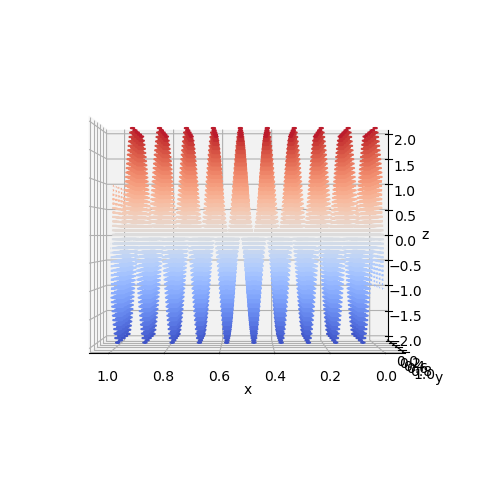

In [143]:
ax.view_init(0, 90)
fig

A clear 10 Hz spatial pattern in the x direction. Note that the spatial pattern oscillates above and below
the zero line.

Here is the same spatial pattern from a different angle - a view with the y axis facing us.

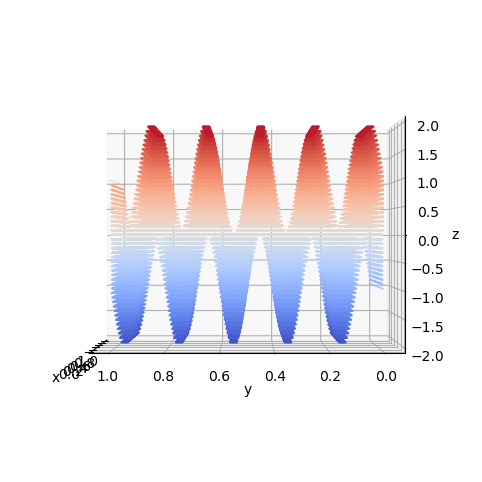

In [144]:
ax.view_init(0, 180)
fig

A clear 5 Hz spatial pattern in the y direction. Note that the spatial pattern oscillates above and below
the zero line.

If you look closely at this latest (third) plot and the one before it, you’ll notice that this one shows 5
cycles along the width and 10 along the depth. The one before shows the opposite - 10 across the
width, 5 across the depth. That’s because we’re looking at the same thing, just from different perspectives.

We know what happens when two sine-wave timeseries of the same frequency are multiplied. Look at
what happens in the spatial domain.

Because this is a 2D spatial pattern, we need to multiply both sine-wave functions: multiple the 10 cycle
pattern with a 10 Hz sine wave, and multiply the 5 cycle pattern with a 5 cycle sine wave.

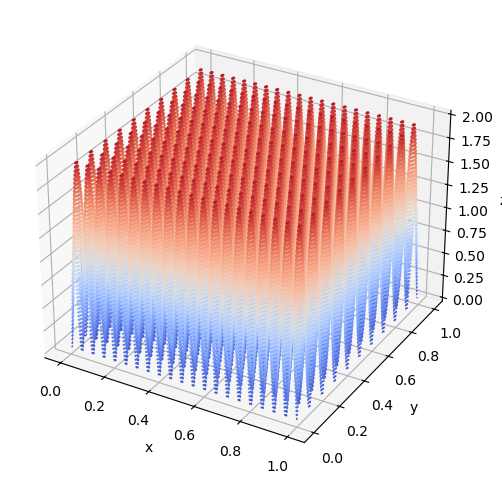

In [145]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X) * np.sin(2*np.pi * 10 * X) + np.sin(2*np.pi * 5 * Y) * np.sin(2*np.pi * 5 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

What is this?

Here is the same spatial pattern from a different angle - the x axis is facing us.

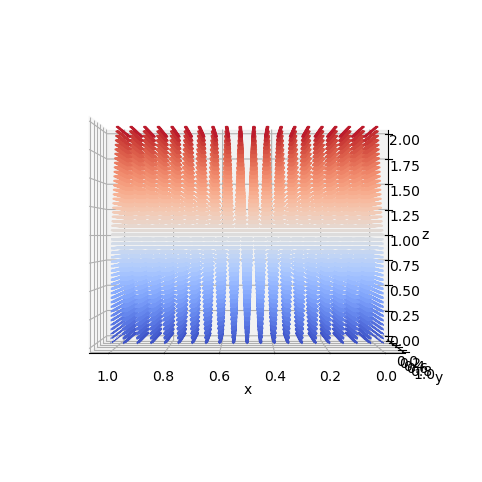

In [146]:
ax.view_init(0, 90)
fig

If you care to count, there are 20 peaks, and all activity is above the x axis. Like a timeseries, a spatial
pattern of a single frequency multiplied by itself moves all activity above the x axis, because all the
values, including the negative values, are squared.

Here is the same spatial pattern from a different angle - the y axis is facing us.

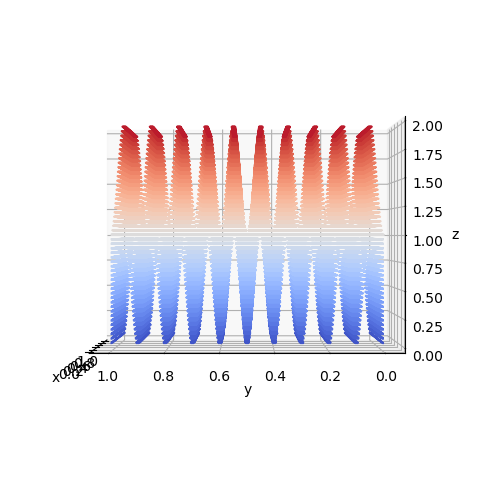

In [147]:
ax.view_init(0, 180)
fig

If you care to count, you will find 10 peaks, and all activity is above the y axis. Like a timeseries, a
spatial pattern of a single frequency multiplied by itself moves all activity above the y axis.

Integrate to calculate the magnitude of the pattern in the x direction.

In [148]:
x = np.arange(0,1, 0.001)
a = round(sum(np.sin(2*np.pi * 10 * x) * np.sin(2*np.pi * 10 * x))*0.001,3) / 0.5
a

1.0

A magnitude of 1.

Integrate to calculate the magnitude of the pattern in the y direction.

In [149]:
y = np.arange(0,1, 0.001)
b = round(sum(np.sin(2*np.pi * 5 * y) * np.sin(2*np.pi * 5 * y))*0.001,3) / 0.5
b

1.0

A magnitude of 1.

Are these magnitude measures correct?

Answer: Take a look at the plots again.

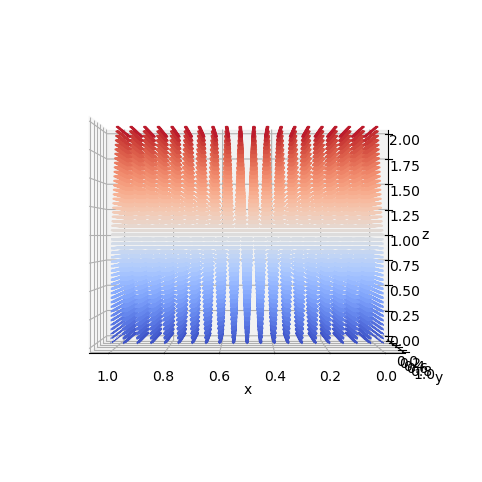

In [150]:
ax.view_init(0, 90)
fig

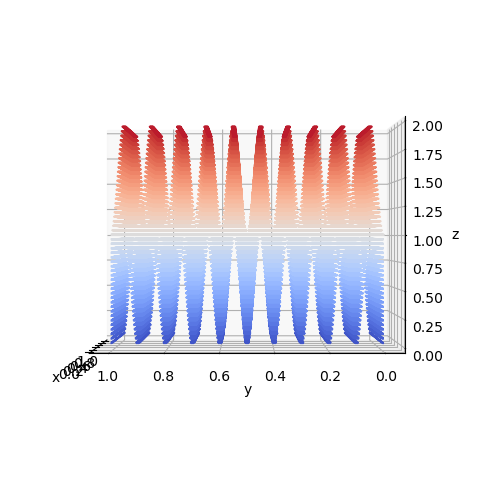

In [151]:
ax.view_init(0, 180)
fig

Hmmm...the plots suggest that the 10 Hz and 5 Hz spatial patterns oscillate +/- 2 units around the x and
y axis. This is because, to create the spatial pattern, we added 10 cycle and 5 cycle activity, both with
gain = 1. To obtain the final magnitude value, simply add the individual amplitudes: 1 + 1 = 2. So yes, the magnitude values we computed are correct.

### <font color=red>DSP.05.T1.b) Multiplying Sine Waves to Create a Spatial Series</font>

Create a spatial pattern with a 15-cycle frequency on one axis and a 6-cycle frequency on the other
axis.

Set the gain of 15-cycle activity to 15 and the gain of 6-cycle activity to 10.

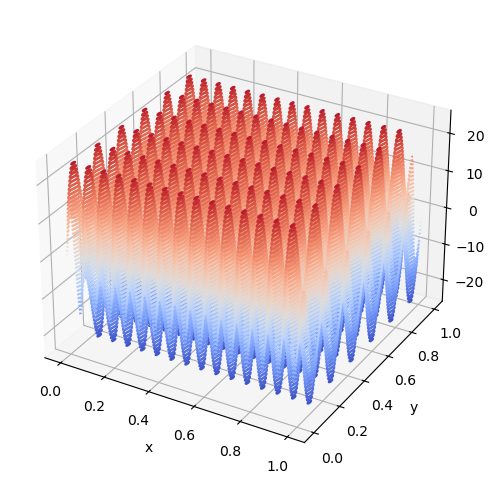

In [152]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 15 * np.sin(2*np.pi * 15 * X)  + 10 * np.sin(2*np.pi * 6 * Y) 

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Count 15 peaks in one direction and 6 peaks in the other direction.

Here is the same spatial pattern from a different angle - the x axis is facing us.

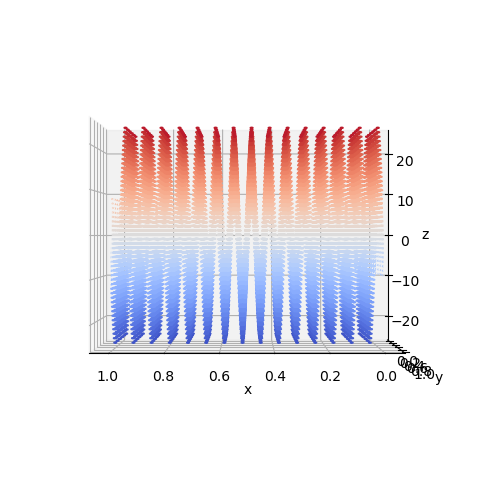

In [153]:
ax.view_init(0, 90)
fig

A clear 15 cycle spatial pattern in the x direction. Note that the spatial pattern oscillates above and
below the zero line.

Here is the same spatial pattern from a different angle - the y axis is facing us.

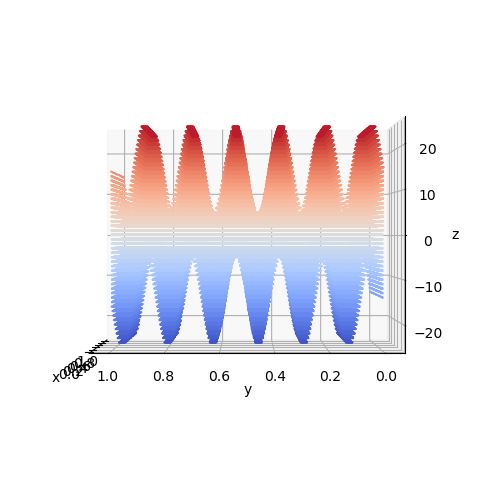

In [154]:
ax.view_init(0, 180)
fig

A clear 6 Hz spatial pattern in the y direction. Note that the spatial pattern oscillates above and below
the zero line.

We know what happens when we multiply two sine-wave timeseries of the same frequency. Take a look
at what happens in the spatial domain.

Because this is a 2D spatial pattern, we need to multiply the 15 cycle pattern with a 15 cycle sine wave
and the 6 cycle pattern with a 6 cycle sine wave.

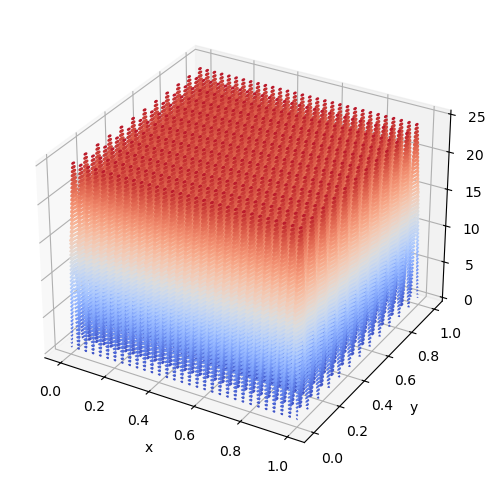

In [155]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 15*np.sin(2*np.pi * 15 * X) * np.sin(2*np.pi * 15 * X) +  10*np.sin(2*np.pi * 6 * Y) * np.sin(2*np.pi * 6 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

What is this?

Here is the same spatial pattern from a different angle - the x axis is facing us.

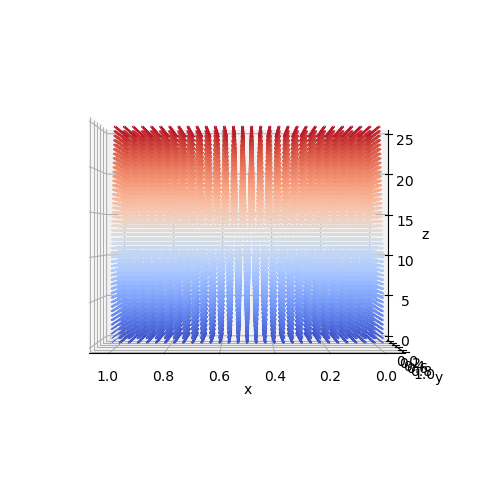

In [156]:
ax.view_init(0, 90)
fig

If you care to count, you will find 30 peaks, and all activity is above the x axis. This is what we should
have anticipated.

Like a timeseries, a spatial pattern of a single frequency multiplied by itself moves all activity above the
x axis.

Here is the same spatial pattern from a different angle - the y axis is facing us.

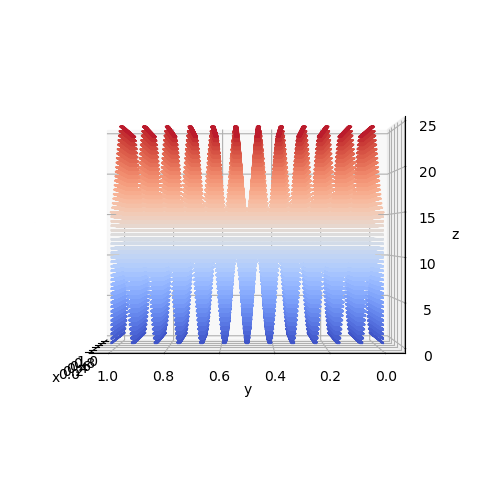

In [157]:
ax.view_init(0, 180)
fig

If you care to count, you will find 12 peaks, and all activity is above the y axis. This is what we should
have anticipated.

Like a timeseries, a spatial pattern of a single frequency multiplied by itself moves all activity above the
y axis.

Integrate to calculate the magnitude of the pattern in the x direction.

In [158]:
x = np.arange(0,1,0.001)
a = round(sum(15*np.sin(2*np.pi * 15 * x) * np.sin(2*np.pi * 15 * x))*0.001,3) / 0.5
a

15.0

A magnitude value of 15.

Integrate to calculate the magnitude of the pattern in the y direction.

In [159]:
y = np.arange(0,1,0.001)
b = round(sum(10*np.sin(2*np.pi * 6 * y) * np.sin(2*np.pi * 6 * y))*0.001,3) / 0.5
b

10.0

A magnitude value of 10.

Take a look at the plots again.

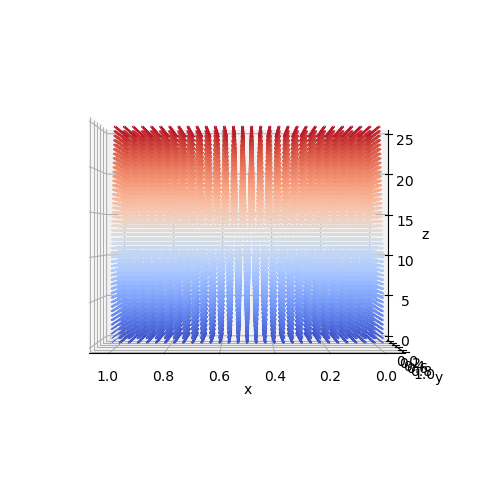

In [160]:
ax.view_init(0, 90)
fig

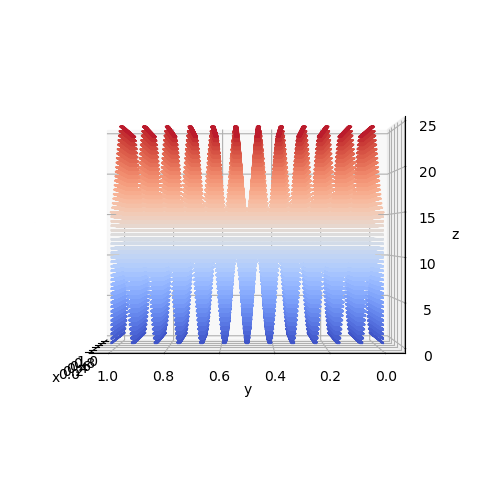

In [161]:
ax.view_init(0, 180)
fig

The plots suggest that the 10 cycle and 5 cycle spatial patterns oscillate +/- 25 units around the x and y
axis.

To create the spatial pattern we added 15 cycle activity with a gain of 15, and 6 cycle activity with a gain
of 10. To obtain the magnitude of the spatial pattern, simply add the individual amplitudes: 15 + 10 = 25.

### <font color=red>DSP.05.T1.c) Obtaining the Magnitude of Activity in a Spatial Pattern with a Phase Offset - the Problem</font>

Return to the first spatial pattern, but this time add a 45-degree phase shift in the x direction and a 60-degree phase shift in the y direction.

Create the plot where activity in each direction is multiplied by the same frequency without a phase
offset.

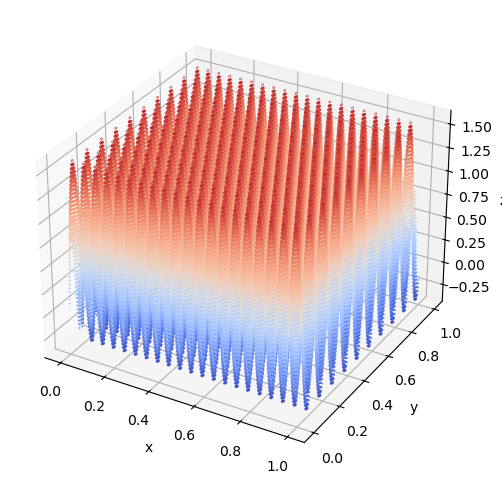

In [162]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = np.sin(2*np.pi * 10 * X + np.pi/4) * np.sin(2*np.pi * 10 * X) + np.sin(2*np.pi * 5 * Y + np.pi/3) * np.sin(2*np.pi * 5 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Notice the negative values on the z axis. In other words, there's now activity below the x-y plane.

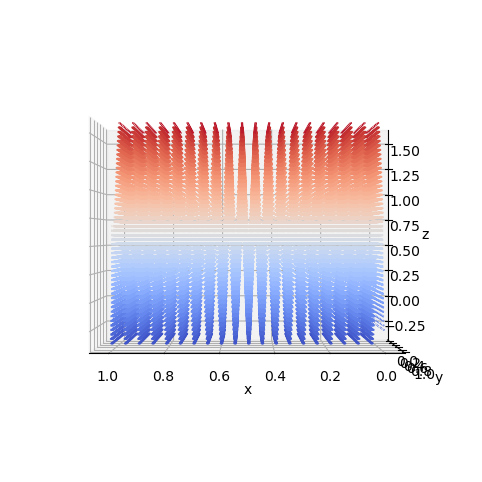

In [163]:
ax.view_init(0, 90)
fig

Calculate the magnitude of activity in each direction.

Here is the calculation in the x direction.

In [164]:
x = np.arange(0,1,0.001)
a = round(sum(np.sin(2*np.pi * 10 * x + np.pi/4) * np.sin(2*np.pi * 10 * x))*0.001,4) / 0.5
a

0.7072

Not quite the known value of 1.

Here is the calculation in the y direction.

In [165]:
y = np.arange(0,1,0.001)
b = round(sum(np.sin(2*np.pi * 5 * y + np.pi/3) * np.sin(2*np.pi * 5 * y))*0.001,4) / 0.5
b

0.5

Not quite the known value of 1.

This is exactly as expected. Why? Just as with a timeseries, in a spatial pattern multiplying two sine
waves of the same frequency but with different phases does not provide an accurate measure of the
magnitude of activity.

### <font color=red>DSP.05.T1.d) Obtaining the Magnitude of Activity in a Spatial Pattern with a Phase Offset - the Solution</font>

Given the similarities between a timeseries and a spatial pattern, obtaining the magnitude of activity in
the x and y directions is straightforward.

Stay with the last spatial pattern but increase the gain in the x direction to 5, and the gain in the y
direction to 9.

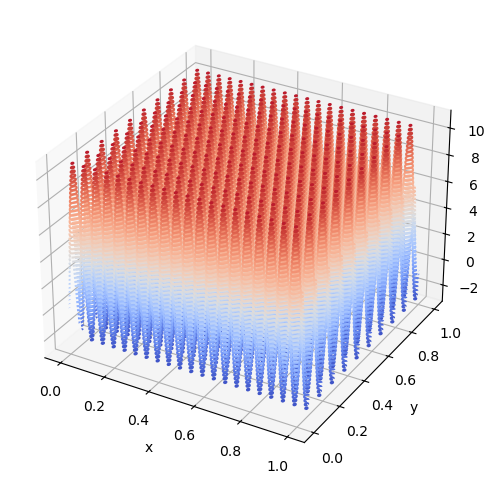

In [166]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 5*np.sin(2*np.pi * 10 * X + np.pi/4) * np.sin(2*np.pi * 10 * X) + 9* np.sin(2*np.pi * 5 * Y + np.pi/3) * np.sin(2*np.pi * 5 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Note the change in the z axis values in the plot above and in the plot below.

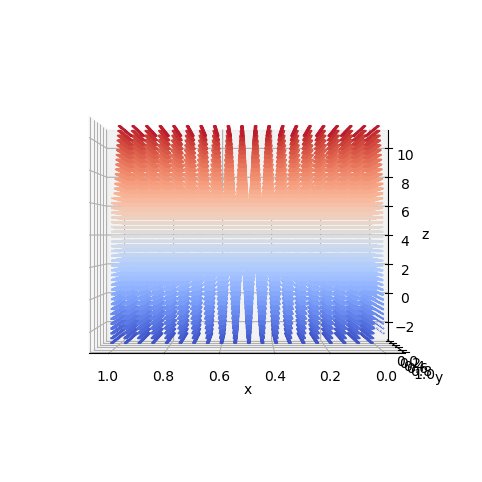

In [167]:
ax.view_init(0, 90)
fig

Calculate the magnitude value associated with the sine wave in each direction.

As with a timeseries example, we could go through the steps to show that, if we multiply the 10-cycle
and 5-cycle sine waves by a sine and cosine function, then calculate the magnitude value for the sine
and cosine component, and then calculate $\sqrt{sin^2 + cos^2}$ , the magnitude of activity at each frequency is
obtained.

Alternatively, as with a timeseries, we could go through the steps to show that, if we multiply the 10-cycle and 5-cycle sine waves by the sine and cosine complex exponential identities, we could follow the same
procedures to obtain the magnitude of activity at each frequency.

If that is what you really want, do that. Otherwise, take the shortcut - multiply each spatial frequency
by the complex exponential term $e^{j ω x 2 π}$.

Obtain the measure of the magnitude of activity in the x direction (set ω = 10).

In [168]:
x = np.arange(0,1,0.001)
a = round(sum(5*np.sin(2*np.pi * 10 * x + np.pi/4) * np.exp(2*np.pi * 10j * x) )*0.001,4) / 0.5
a

(3.5356+3.5356j)

Now calculate the modulus.

In [169]:
round(abs(a),2)

5.0

Checks out - this is the x direction magnitude value.

Here is the calculation of the magnitude of activity in the y direction (set ω = 5).

In [170]:
y = np.arange(0,1,0.001)
b = round(sum(9*np.sin(2*np.pi * 5 * x + np.pi/3) * np.exp(2*np.pi * 5j * x) )*0.001,4) / 0.5
b

(7.7942+4.5j)

In [171]:
round(abs(b),2)

9.0

Checks out - this is the y direction magnitude value. That is all there is to it.

## <font color=red>DSP.05.T2) Obtaining the Magnitude of a 2D Spatial Pattern That Contains Two Sine Waves in Each Direction</font>

### <font color=red>DSP.05.T2.a) Probing Spatial Data</font>

The examples above indicate that, by multiplying a spatial pattern with the complex exponential term
$e^{j ω x 2 π}$, the magnitude of activity at that frequency is obtained. It stands to reason that, if we encountered
a spatial pattern of unknown frequency(ies), we could apply procedures outlined in the Basics to
determine the unknown frequency(ies).

Here is a spatial pattern composed of two unknown sine waves (in both the x and y directions). Using
the same strategy used with frequencies in the time domain, find the frequencies (and associated
magnitudes and phases).

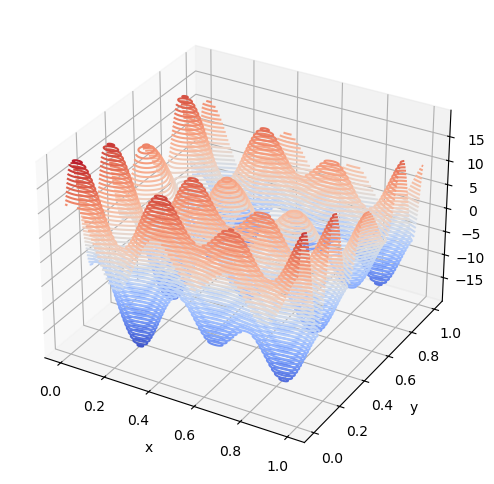

In [172]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)

Z = unknownmag1*np.sin(2*np.pi * unknownfreq1 * X +unknownphase1) + \
unknownmag2*np.sin(2*np.pi * unknownfreq2 * X +unknownphase2) +  \
unknownmag3* np.sin(2*np.pi * unknownfreq3 * Y + unknownphase3) + \
unknownmag4*np.sin(2*np.pi * unknownfreq4 * Y + unknownphase4)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Feel free to modify the angle of the view.

It's just a matter of plugging and chugging to find the unknown frequencies and associated magnitude
and phase values. Let’s do it:

First, assess activity in the x direction. Start at the beginning, examining the first term in the x-axis - is
there 1-cycle activity?

In [173]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag1*np.sin(2*np.pi * unknownfreq1 * x + unknownphase1) * np.exp(2*np.pi * 1j * x) )*0.001,4) / 0.5
a

-0j

No.

How about 2-cycle activity?

In [174]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag1*np.sin(2*np.pi * unknownfreq1 * x + unknownphase1) * np.exp(2*np.pi * 2j * x) )*0.001,4) / 0.5
a

(-0+0j)

No.

How about 3-cycle activity?

In [175]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag1*np.sin(2*np.pi * unknownfreq1 * x + unknownphase1) * np.exp(2*np.pi * 3j * x) )*0.001,4) / 0.5
a

(3.5356+3.5356j)

A hit!

Calculate the magnitude and phase.

In [176]:
round(abs(a),2)

5.0

In [177]:
phaseradians = round(np.arctan(np.real(a)/np.imag(a)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

45.0

So far, so good. Keep moving, there is additional activity.

Take the second term in the x direction. Again, start at the beginning - is there 1-cycle activity?

In [178]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag2*np.sin(2*np.pi * unknownfreq2 * x + unknownphase2) * np.exp(2*np.pi * 1j * x) )*0.001,4) / 0.5
a

0j

No.

How about 2-cycle activity?

In [179]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag2*np.sin(2*np.pi * unknownfreq2 * x + unknownphase2) * np.exp(2*np.pi * 2j * x) )*0.001,4) / 0.5
a

(3+0j)

Bulls-eye.

Calculate the magnitude and phase of the 2-cycle-per-meter activity.

In [180]:
round(abs(a),2)

3.0

In [181]:
phaseradians = round(np.arctan(np.real(a)/np.imag(a)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

90.0

Take stock.

1st frequency = a 3-cycle sine wave with a gain of 5 and a phase offset of 45°.

2nd frequency = a 2-cycle sine wave with a gain of 3 and a phase offset of 90°.

OK. Keep going. Let’s tackle the y direction.

Compute the same measures for activity in the y direction. Start at the beginning with the first term in
the y direction - is there 1-cycle activity?

In [182]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag3*np.sin(2*np.pi * unknownfreq3 * x + unknownphase3) * np.exp(2*np.pi * 1j * x) )*0.001,4) / 0.5
a

0j

No.

How about 2-cycle activity?

In [183]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag3*np.sin(2*np.pi * unknownfreq3 * x + unknownphase3) * np.exp(2*np.pi * 2j * x) )*0.001,4) / 0.5
a

0j

No.

How about 3-cycle activity? 

In [184]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag3*np.sin(2*np.pi * unknownfreq3 * x + unknownphase3) * np.exp(2*np.pi * 3j * x) )*0.001,4) / 0.5
a

-0j

No.

How about 4-cycle activity?

In [185]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag3*np.sin(2*np.pi * unknownfreq3 * x + unknownphase3) * np.exp(2*np.pi * 4j * x) )*0.001,4) / 0.5
a

(4+6.9282j)

A hit - splendific!

Calculate the magnitude and phase of the 4-cycle-per-meter activity.

In [186]:
round(abs(a),2)

8.0

In [187]:
phaseradians = round(np.arctan(np.real(a)/np.imag(a)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

30.0

Keep moving, there is additional activity. Take the second term in the y direction.

Start at the beginning - is there 1-cycle activity?

In [188]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag4*np.sin(2*np.pi * unknownfreq4 * x + unknownphase4) * np.exp(2*np.pi * 1j * x) )*0.001,4) / 0.5
a

(-0+0j)

No.

How about 2-cycle activity?

In [189]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag4*np.sin(2*np.pi * unknownfreq4 * x + unknownphase4) * np.exp(2*np.pi * 2j * x) )*0.001,4) / 0.5
a

(-0+0j)

No.

How about 3-cycle activity?

In [190]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag4*np.sin(2*np.pi * unknownfreq4 * x + unknownphase4) * np.exp(2*np.pi * 3j * x) )*0.001,4) / 0.5
a

0j

No.

How about 4-cycle activity?

In [191]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag4*np.sin(2*np.pi * unknownfreq4 * x + unknownphase4) * np.exp(2*np.pi * 4j * x) )*0.001,4) / 0.5
a

0j

No.

How about 5-cycle activity?

In [192]:
x = np.arange(0,1, 0.001)
a = round(sum(unknownmag4*np.sin(2*np.pi * unknownfreq4 * x + unknownphase4) * np.exp(2*np.pi * 5j * x) )*0.001,4) / 0.5
a

4j

Got it!

Calculate the magnitude and phase of 5-cycle-per-meter activity.

In [193]:
round(abs(a),2)

4.0

In [194]:
phaseradians = round(np.arctan(np.real(a)/np.imag(a)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

0.0

#### Take stock.

In the x direction, the following measures were calculated.

1st frequency = a 3-cycle sine wave with a gain of 5 and a phase offset of 45°.

2nd frequency = a 2-cycle sine wave with a gain of 3 and a phase offset of 90°.

In the y direction, the following measures were calculated.

1st frequency = a 4-cycle sine wave with a gain of 8 and a phase offset of 30°.

2nd frequency = a 5-cycle sine wave with a gain of 4 and a phase offset of 0 = 360°.

Use this information to create your own plot and then compare this spatial pattern of the original
spatial pattern.

It's a drag/hassle/lot of trouble doing this manually, but it gets the job done.

Reward yourself for a job well done and take a two-minute break before continuing -

Get up and walk around, take a drink of water, stretch you shoulders, neck, wrist, and fingers. Stretch
the muscles in your face - close your eyes and hold them tightly shut for 10 seconds. Open your eyes
and then do it one more time.

## <font color=red>DSP.05.T3) Digitized Timeseries - Computing magnitude and phase from discrete timeseries</font>

### <font color=red>DSP.05.T3.a) Obtaining Magnitude and Phase Measures from a Digitized (i.e., discrete, not continuous) Timeseries</font>

The examples above involved functions that we conceived of as continuous. More often than not, however, we're working
with a digitized signal (i.e., activity sampled across time or space). With a digitized timeseries, the above
procedures are slightly modified. Sometimes it matters a lot whether you’re working with a continuous
or discrete function, but here it’s not a big deal.

Create a 10 Hz timeseries, 1 second in length, digitized at 4096 Hz. (4096 may seem like an arbitrary choice, but it's 2 to the 12th power, and sometimes having a sampling rate that's a power of 2, and a total number of samples that's a multiple of a power of 2, is helpful.)

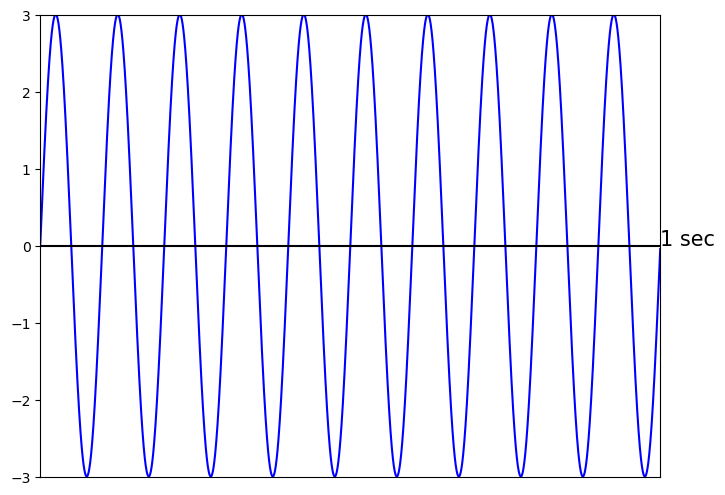

In [220]:
time = np.arange(0,1, 1/4096)
freq = 10
timeseries = 3 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The timeseries is represented with 4096 datapoints over a 1-second period. As a result, the 10 Hz timeseries
completes 10 full cycles over 4096 samples.

Calculate how often a datapoint is collected.

In [221]:
1/4096

0.000244140625

A datapoint is collected every 0.000244141 seconds = 0.244141 milliseconds. Note that this has nothing to do with the signal
being digitized. It depends only on how often we sample. Don’t confuse the frequency of the signal
with the frequency of the sampling we do of that signal. The Nyquist rule tells us that we should think about the relationship between those 2 frequencies - a crucial issue. But the 2 frequencies are completely different things. 4096 Hz sampling may or may not be sufficient to avoid aliasing. That depends on the relationship between the frequency of your sampling and the frequencies in the signal you're sampling, as we discussed earlier.

As with a continuous timeseries, plot the magnitude of the complex values obtained by (3 Sin[10 x 2 π]) $e^{i 10 x 2 π}$ as a function of x.

The way to plot the 1-second period is highlighted in red.

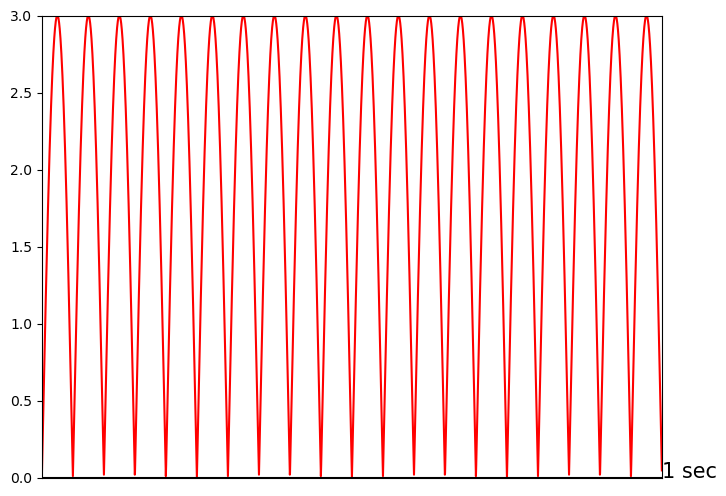

In [222]:
time = np.arange(0,1, 1/4096)
freq = 10
amplitude = 3 * np.sin(2*np.pi * freq * time)
complex_amplitude = np.exp(2*np.pi * 10j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Looks just like the plot obtained by multiplying two 10 Hz sine waves (obtaining 20 peaks, all activity
above the x axis).

As with a continuous function, calculate the magnitude value across a 1-second interval. Because this is
a discrete dataset, the interval is defined in points. So, instead of using an integral (suitable for a continuous function), we calculate the dot product (i.e., summation is used). Also, note that, instead of dividing by 4096 points, the denominator
is 1/2 the total number of points. (That has to do with the arithmetic of spectra, not a concern here.)

In [223]:
x = np.arange(0,1, 1/4096)
spectrum = round(sum(amplitude * complex_amplitude)*1/4096,4) / 0.5
spectrum

3j

Once here, no changes are needed to compute the magnitude and phase - just use the 'abs' and the 'arcTan' functions, as we did for a continuous timeseries.

In [224]:
round(abs(spectrum),2)

3.0

In [225]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

0.0

The 'abs' function tells us that the magnitude of 10 Hz activity is 3 .

The 'arcTan' function tells us that the phase of 10 Hz activity is 0° .

### <font color=red>DSP.05.T3.b) Obtaining Magnitude and Phase Measures from a Digitized (i.e., discrete, not continuous) Timeseries</font>

Here is another example.

Create a 15 Hz timeseries, with gain of 20, 1 second in length, digitized at 3000 Hz.

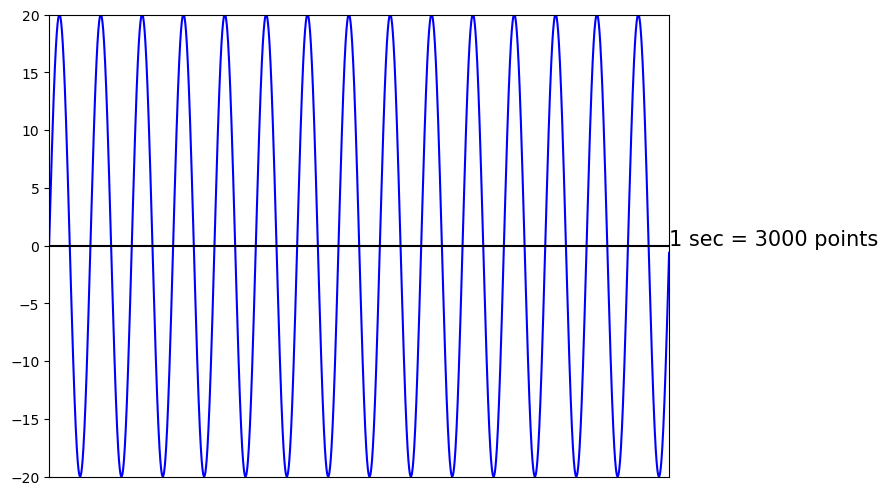

In [226]:
time = np.arange(0,1, 1/3000)
freq = 15
timeseries = 20 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec = 3000 points',fontsize=15)
plt.show()

The timeseries is represented with 3000 datapoints over a 1-second period. As a result, the timeseries
completes 15 full cycles across the 3000 datapoints. Of course, it would complete 15 cycles in 1 second no matter how
often we sampled it, since it’s a 15 Hz signal. But because we sampled it with 3000 points in 1 second,
it’s 15 cycles over 3000 datapoints.

Calculate how often a datapoint is collected.

In [227]:
1/3000

0.0003333333333333333

A datapoint is collected every 0.00033333 seconds.

As with a continuous timeseries, plot the magnitude of the complex values obtained by (20 Sin[15 x 2 π]) $e^{i 15 x 2 π}$ as a function of x over 1 second.

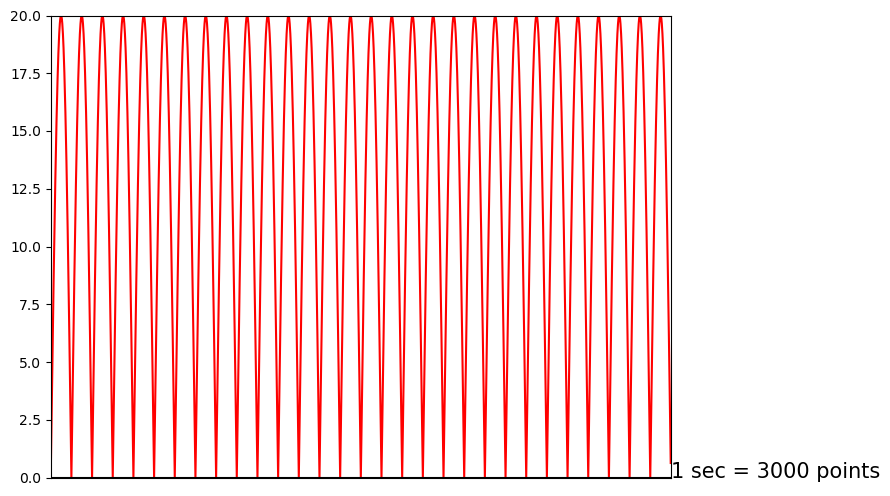

In [228]:
time = np.arange(0,1, 1/3000)
freq = 15
amplitude = 20 * np.sin(2*np.pi * freq * time)
complex_amplitude = np.exp(2*np.pi * 15j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec = 3000 points',fontsize=15)
plt.show()

Looks just like the plot obtained by multiplying two 15 Hz sine waves: 30 peaks, all activity
above the x axis. (Reminder: the positive and negative halves of each sine-wave cycle reach a peak amplitude of +20 or -20, and the magnitude as treated here is +20 either way. In effect, the negative halves get flipped up, so 15 cycles provides 30 positive peaks in the magnitude plot.)

Calculate the magnitude value across a 1-second interval. Because this is a discrete dataset, the 1-second interval is defined in points. So, instead of using an integral, the dot product (i.e., summation) is
applied. Note that, instead of dividing by 3000, the denominator is 1/2 the total number of points.

In [229]:
x = np.arange(0,1, 1/3000)
spectrum = round(sum(amplitude * complex_amplitude)*1/3000,4) / 0.5
spectrum

20j

Once we are here, no changes are needed to compute the magnitude and phase.

In [230]:
round(abs(spectrum),2)

20.0

In [231]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

0.0

The 'abs' function tells us that the magnitude of 15 Hz activity is 20 .

The 'arcTan' function tells us that the phase of 15 Hz activity is 0°.

### <font color=red>DSP.05.T3.c) Obtaining Magnitude and Phase Measures from a Digitized (i.e., discrete, not continuous) Timeseries</font>

Look at a slightly more complicated example.

Create a 200 Hz timeseries, with gain of 10, 1 second in length, digitized at 250 Hz.

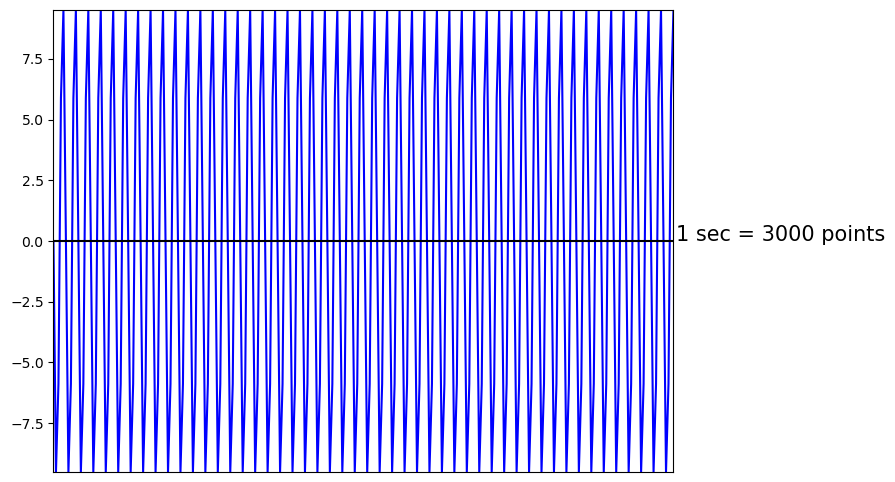

In [232]:
time = np.arange(0,1, 1/250)
freq = 200
timeseries = 10 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec = 3000 points',fontsize=15)
plt.show()

The timeseries is represented with 250 datapoints over a 1-second period.

Calculate how often a datapoint is collected.

In [233]:
1/250

0.004

A datapoint is collected every 0.004 seconds.

As with a continuous timeseries, plot the magnitude of the complex values obtained by (10 Sin[200 x 2 π]) $e^{i 200 x 2 π}$ as a function of x.

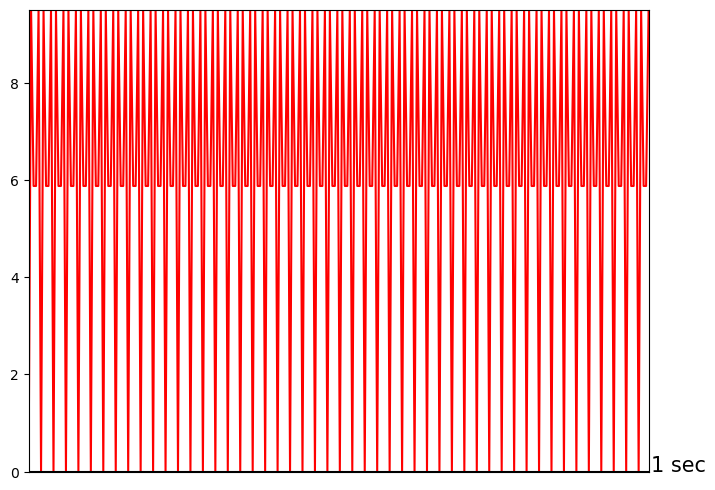

In [234]:
time = np.arange(0,1, 1/250)
freq = 200
amplitude = 10 * np.sin(2*np.pi * freq * time)
complex_amplitude = np.exp(2*np.pi * 200j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude and phase values. (Of note, the above plot looks odd. Something seems wrong - see below.)

In [235]:
x = np.arange(0,1, 1/250)
spectrum = round(sum(amplitude * complex_amplitude)*1/250,4) / 0.5
abs(spectrum)

10.0

The output of the 'abs' function tells us that the magnitude of 200 Hz activity is 10.

It seems like everything checks out, but did you notice a problem?

Answer: The 200 Hz signal was sampled at 250 Hz. That is below the Nyquist sampling rate! We covered Nyquist
in Chapter 2.

Plot the frequency spectrum of the digitized signal.

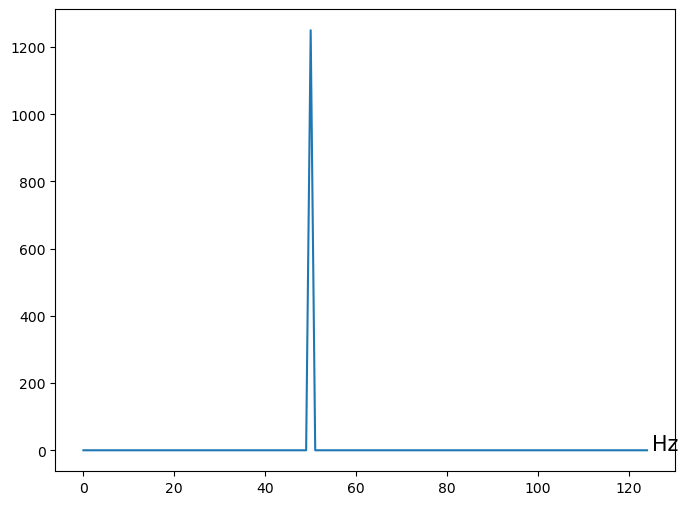

In [236]:
make_plot_freq_1(amplitude,250)

plt.text(125,0,'Hz',fontsize=15)
plt.show()

A peak at 50 Hz. Why? Why not at 200 Hz? Because the Nyquist Frequency (defined as half the sampling rate, so 125 Hz in this case) is not at least twice
as fast as the fastest frequency in the signal (200 Hz). Why does the 200 Hz signal alias to 50 Hz?
Because 50 and 200 are equidistant from the Nyquist frequency of 125 Hz. Sometimes we say that a
signal “folds over the Nyquist Frequency” when it aliases.

## <font color=red>DSP.05.T4) Digitized Timeseries - Computing Magnitude and Phase from a Discrete Timeseries with Noise</font>

### <font color=red>DSP.05.T4.a) Obtaining Magnitude and Phase Measures from a Digitized Timeseries with Noise</font>

Create a 40 Hz timeseries, with gain of 1, 1 second in length, digitized at 500 Hz.

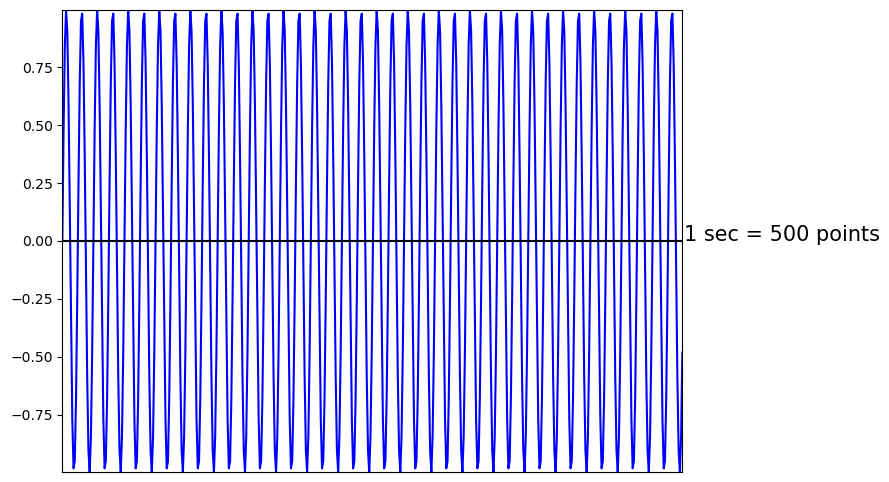

In [237]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 1 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec = 500 points',fontsize=15)
plt.show()

In this example, over a 1-second
interval a sample is collected every 0.002 seconds. Now create the same 40 Hz timeseries, but with random noise added. (Throughout the remainder of this section, we will create noise distributions with a mean value of 0 and a standard deviation of the distribution (the spread of width of the distribution) of 0.5. If you need a refresher, see Lesson 4 Basics for an extended discussion of random noise distributions.)

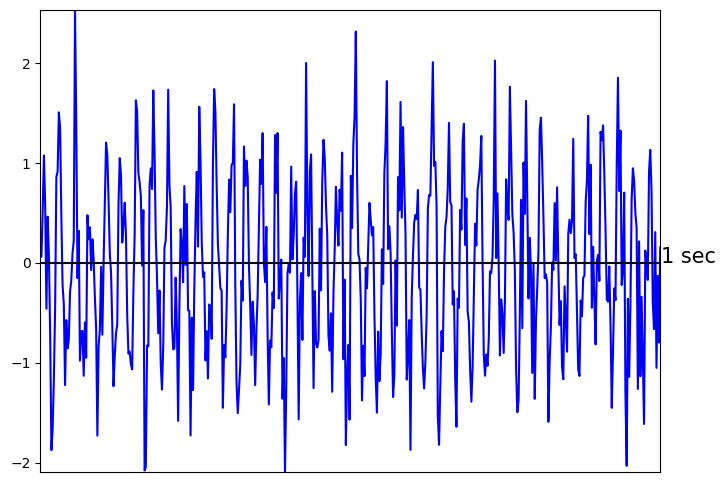

In [238]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 1 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Although 40 Hz activity is visible, the 40 Hz signal is distorted, because of the noise we added.
Plot the magnitude of the complex values obtained by Sin[40 x 2 π] $e^{i 40 x 2 π}$  as a function of x.

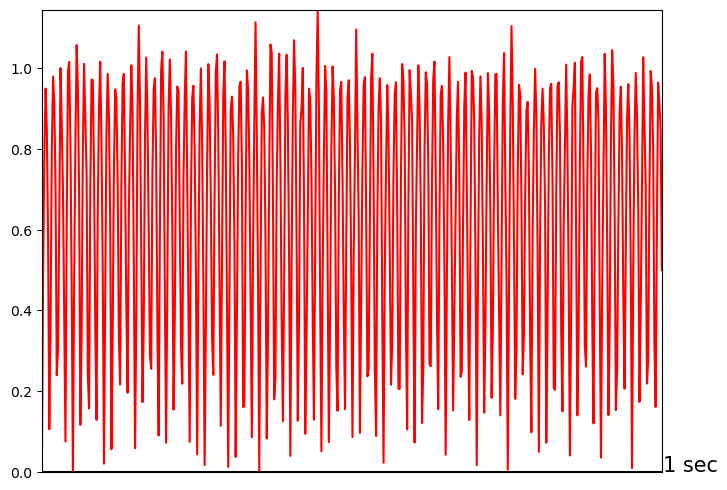

In [239]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,.05,len(time))
amplitude = 1 * np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries = abs(amplitude * complex_amplitude)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Looks somewhat similar to a plot obtained by multiplying two 40 Hz sine waves, in that there are 80 peaks with all
activity above the x axis). Note that the plot runs from 0 to 500 points, because we digitized at 500 Hz.

Calculate the magnitude and phase of 40 Hz activity.

In [240]:
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.9976080192139596

In [241]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

0.23

This looks promising. Even though there was noise, the magnitude of 40 Hz (a gain of 1) was correctly identified.

### <font color=red>DSP.05.T4.b) Obtaining Magnitude and Phase Measures from a Digitized Timeseries with Noise</font>

Create the same 40 Hz timeseries but this time with a gain of 0.5 (over a 1-second interval, a sample is collected every 0.002 seconds = 1/500).

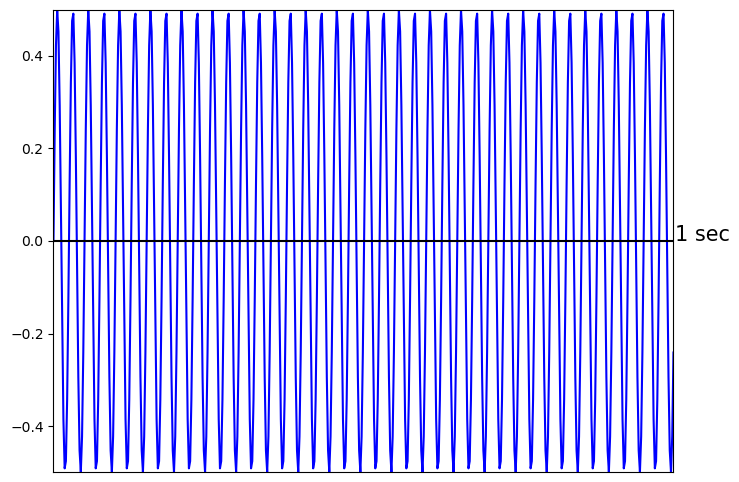

In [242]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 0.5 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The signal strength is decreased by half.

Add random noise with the same amplitude as before to this decreased 40 Hz signal (again, over a 1-second interval, a sample is collected every 0.002 seconds = 1/500).

Decreasing the gain by half decreases the signal-to-noise ratio (smaller signal, same noise).

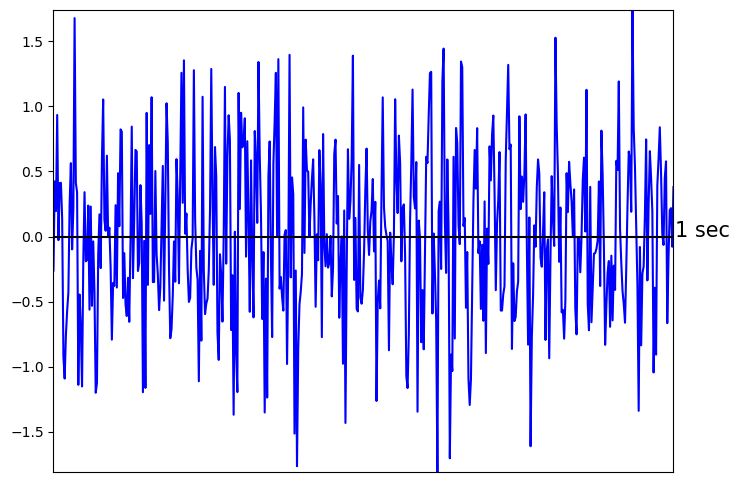

In [243]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 0.5 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

40 Hz activity is clearly present, but harder difficult to detect.

As with a continuous timeseries, plot the magnitude of the complex values obtained by (0.5 Sin[40 x 2 π]) $e^{j40 x 2 π}$ as a function of x.

Note the range of x values used to correctly plot this discrete timeseries.

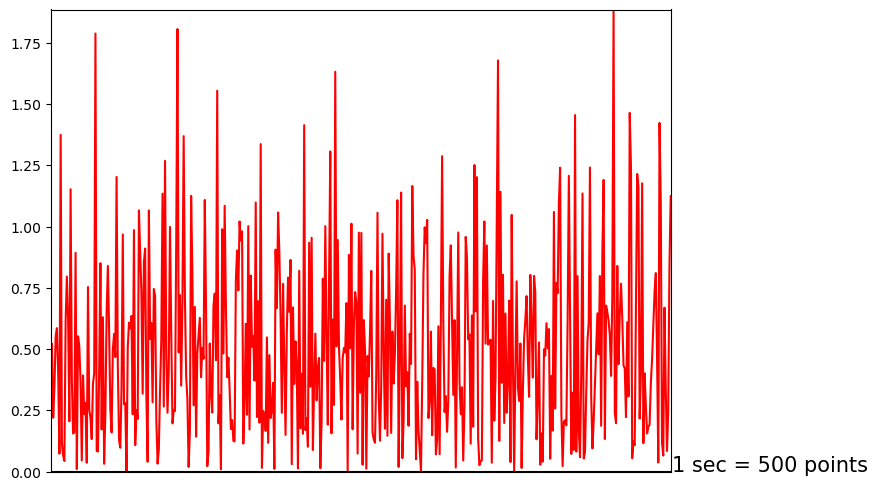

In [244]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
amplitude = 0.5 * np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries = abs(amplitude * complex_amplitude)
make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec = 500 points',fontsize=15)
plt.show()

Looks somewhat similar to a plot obtained by multiplying two 40 Hz sine waves (obtaining 80 peaks with all activity above the x axis). Note that the plot runs from 0 to 500.

Calculate the magnitude and phase of 40 Hz activity.

In [245]:
x = np.arange(0,1, 1/500)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.5004888010735105

In [246]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-1.95

The output of the 'abs' function tells us that the magnitude of 40 Hz activity is approximately 0.5.
Looks promising - despite a decreased signal-to-noise ratio, it is still possible to recover close to the correct
magnitude value of the 40 Hz signal.

### <font color=red>DSP.05.T4.c) Obtaining Magnitude and Phase Measures from a Digitized Timeseries with Noise</font>

Create a 40 Hz timeseries but with a gain of 0.1.

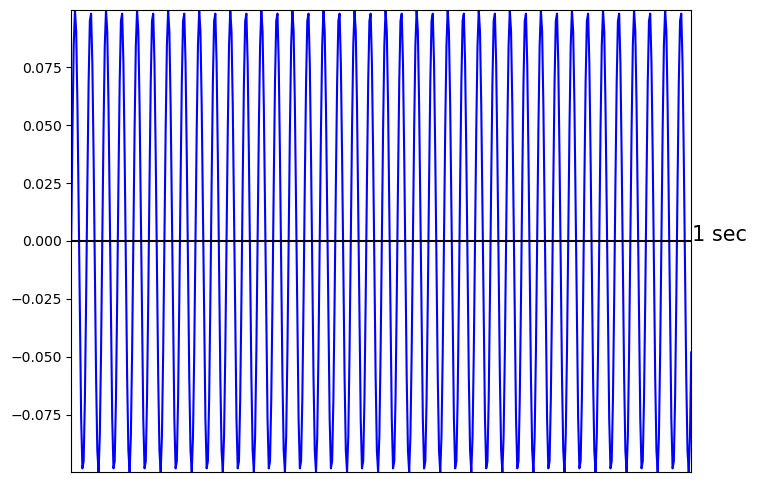

In [247]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 0.1 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Compared to when the gain was 1, the signal strength is decreased 90%.

Add the same random noise to the 40 Hz signal (over a 1-second interval, a sample is collected every 0.002 seconds = 1/500).

Decreasing the gain by 90% decreases the signal-to-noise ratio even more.

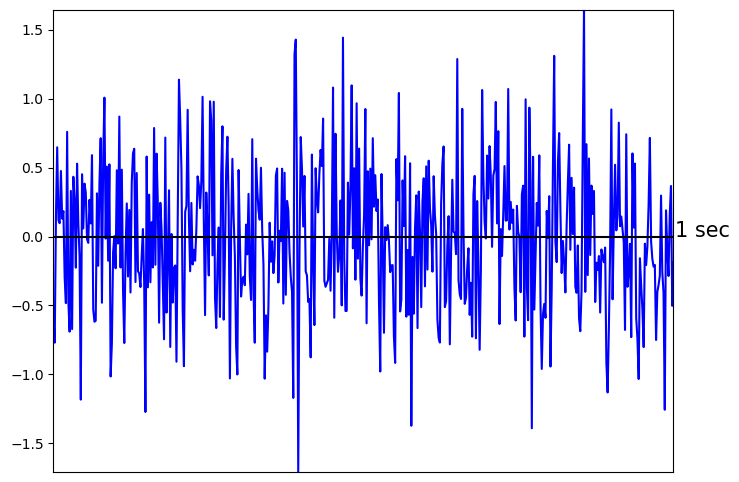

In [248]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 0.1 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Is 40 Hz activity still visible?
Plot the magnitude of the complex values obtained by (0.1 Sin[40 x 2 π]) $e^{j40 x 2 π}$ as a function of x.

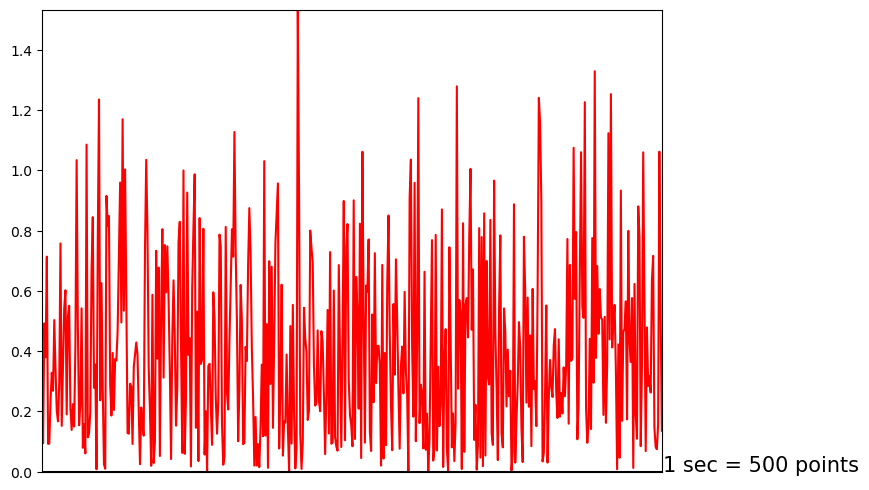

In [249]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
amplitude = 0.1 * np.sin(2*np.pi * freq * time) + noise
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries =abs(amplitude * complex_amplitude)
make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec = 500 points',fontsize=15)
plt.show()

Calculate the magnitude and phase of 40 Hz activity.

In [250]:
x = np.arange(0,1, 1/500)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.1186187169042053

In [251]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

3.48

The output of the 'abs' function tells us that the magnitude of 40 Hz activity is approximately 0.1. If you run the above few cells several times, so that different random noise is added each time, you'll find that just how close to 0.1 it is will vary, because it will depend on the exact random noise that was added. But despite the much smaller signal, it looks like it is possible to recover close to the correct magnitude value of the 40 Hz signal.

In the next section, we will continue to concentrate on examining the effect of noise on the amplitude measure. In particular, we will examine how we can quantitatively assess whether our magnitude estimate is correct. (In the 'Give it a try' sections, we will look at the effect of noise on the phase measure. For the moment, briefly look at the phase calculations. In all of the examples there is no phase offset, so the phase measures should all be zero. But, most of the time, the phase is not zero. In later sections we will find out why.) 

### <font color=red>DSP.05.T4.d) Obtaining Magnitude and Phase Measures from a Digitized Timeseries with Noise</font>

One last time. Create the same 40 Hz timeseries, this time with a really low gain of 0.01.

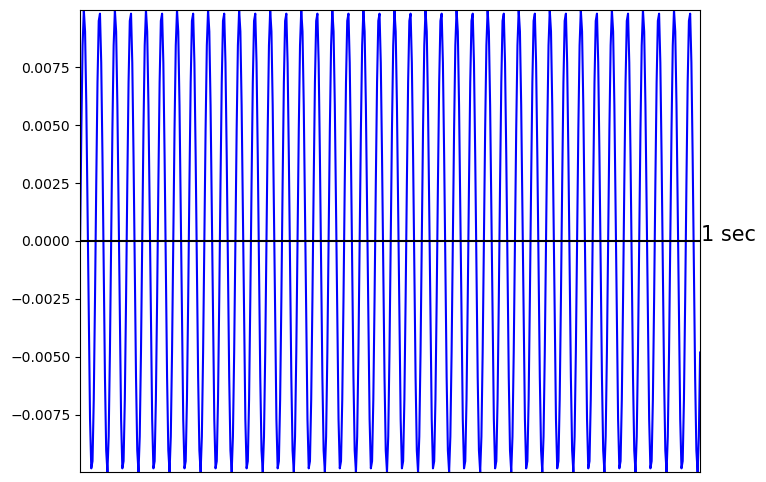

In [252]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 0.01 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Compared to when the gain was 1, signal strength is decreased 99%.

Add the same random noise to this greatly reduced 40 Hz signal (over a 1 second interval a sample is collected every 0.002 seconds = 1/500).

Decreasing the gain by 99% significantly decreases the signal-to-noise ratio.

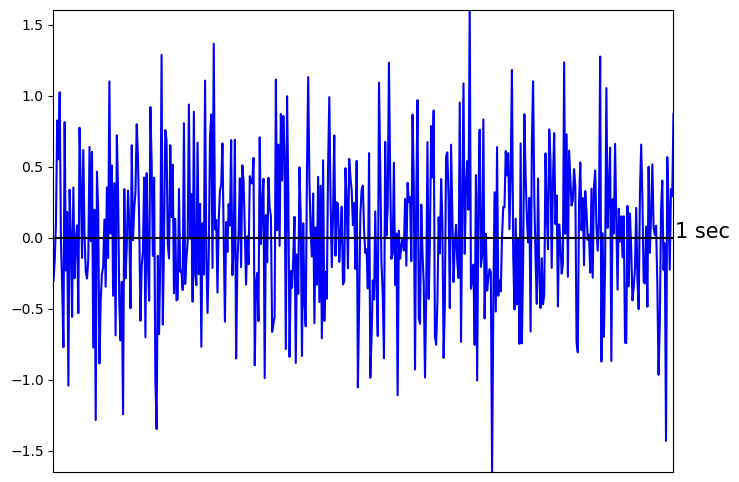

In [253]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 0.01 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Plot the absolute value of the complex values obtained by (0.01 Sin[40 x 2 π]) $e^{j40 x 2 π}$ as a function of x.

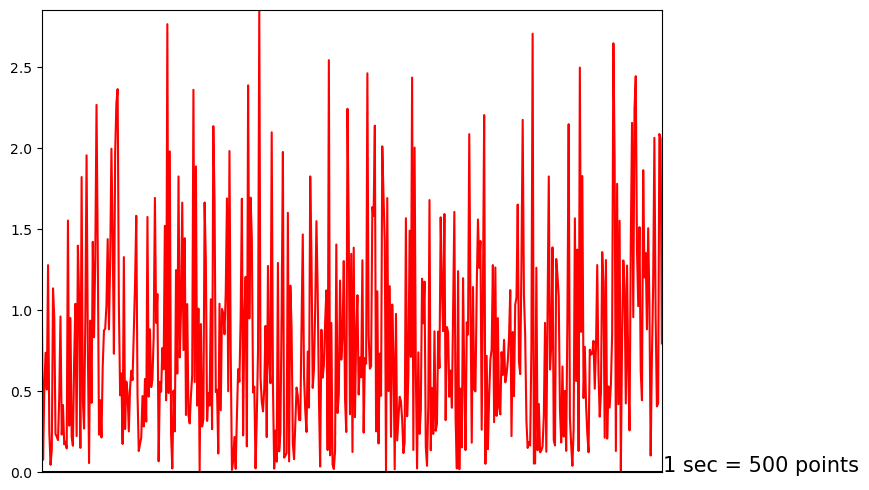

In [254]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,1,len(time))
amplitude = 0.01 * np.sin(2*np.pi * freq * time)+noise
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries =abs(amplitude * complex_amplitude)
make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec = 500 points',fontsize=15)
plt.show()

Calculate the magnitude and phase of 40 Hz activity.

In [255]:
x = np.arange(0,1, 1/500)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.03352193311848229

In [256]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-14.87

The output of the 'abs' fuction probably looks somewhat close to 0.01, but is it reliable? (Again, how close it is will vary with the random noise added. If you run the code a few times, you'll get different values, but they'll average close to 0.01 if you run enough of them. The lower the signal-to-noise ratio, the more times you'll typically need to run the code to get a good approximation. This is analogous to needing a bigger sample size to detect a smaller effect in statistical inference.)

Answer: One way to examine this issue is to examine the magnitude of activity computed at other frequencies.
We know that multiplying a noiseless 40 Hz signal with a sine wave of another frequency produces a magnitude value of zero. However, when random noise is added to the 40 Hz signal, because such noise contains activity at all frequencies, the magnitude value at other frequencies will be nonzero. So, some activity that's approximately 40 Hz is included in the noise.

Create a new 40 Hz timeseries with a gain of 0.01 plus noise. 

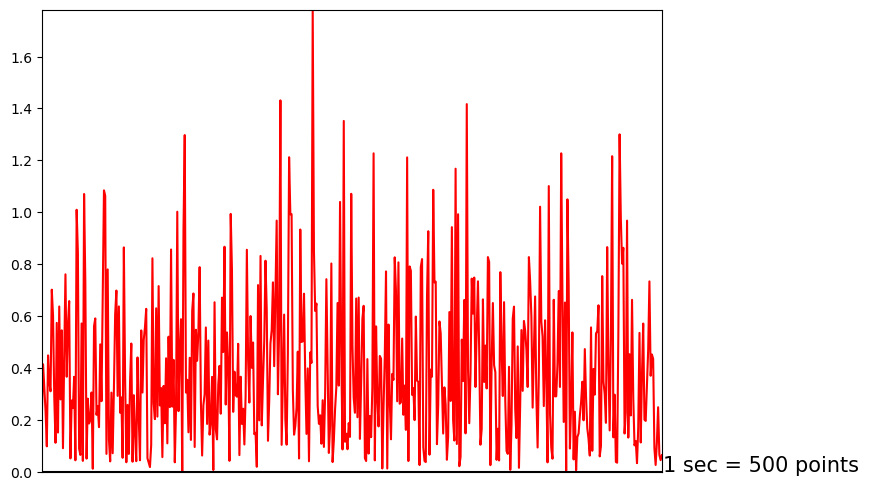

In [257]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
amplitude = 0.01 * np.sin(2*np.pi * freq * time)+noise
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries =abs(amplitude * complex_amplitude)
make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec = 500 points',fontsize=15)
plt.show()

Calculate the magnitude and phase of 40 Hz activity.

In [258]:
x = np.arange(0,1, 1/500)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.06657957644803697

In [259]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

50.0

Keep in mind the above 40 Hz magnitude value.

Although the time series does not contain 25 Hz activity, set ω = 25 and plot the magnitude of the complex values obtained by (0.01 Sin[40 x 2 π])  $e^{i25 x 2 π}$ as a function of x.

In [260]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 25j * time)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.027806474066303336

In [261]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

88.76

The magnitude of 25 Hz activity is probably approximately the value obtained for 40 Hz activity (this
could vary, depending on the noise distribution you computed, since the code generates random numbers).

Check a few other frequencies. 

Here is 10 Hz.

In [262]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 10j * time)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.01769180601295413

In [263]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-42.71

Here is 38 Hz.

In [264]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 38j * time)
spectrum = round(sum(amplitude * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.04614585571857997

In [265]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-47.46

The magnitude values estimated for 10 and 38 Hz are similar to what we got for 40 Hz. This is evidence that
the 40 Hz magnitude measure is largely a measure of the background noise.

### <font color=red>DSP.05.T4.e) Judging Real Activity from Background Noise</font>

Create the same 40 Hz timeseries with the gain set at 0.5.

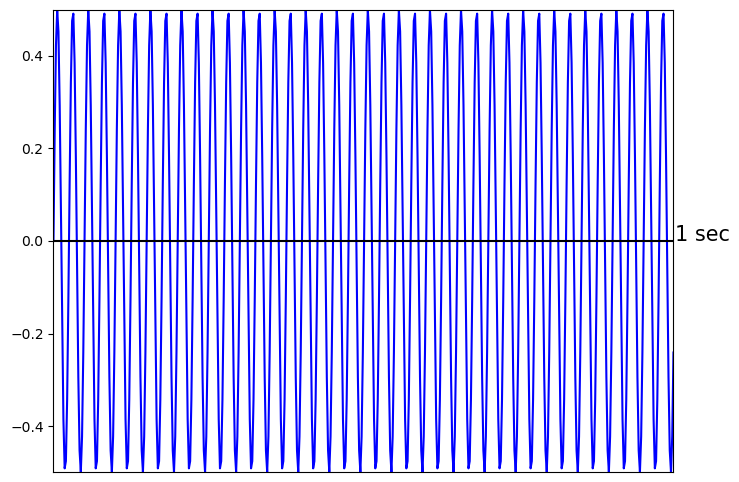

In [280]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries =0.5 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

With a gain of 0.5, the signal strength is decreased by half.

Add random noise to the 40 Hz signal (over a 1-second interval a sample is collected every 0.002 seconds = 1/500).

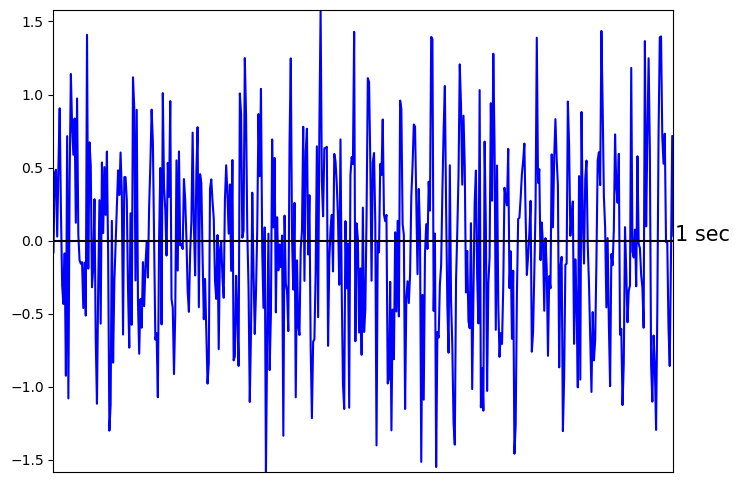

In [281]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5, len(time))
timeseries =0.5 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 40 Hz activity.

In [282]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 40j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.5378001487541632

In [283]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

2.71

The magnitude of 40 Hz activity is approximately 0.5. This is the correct value. 

See whether this is different than the magnitude values estimated at all other frequencies.

Obtain and plot the magnitude estimate for all other frequencies.

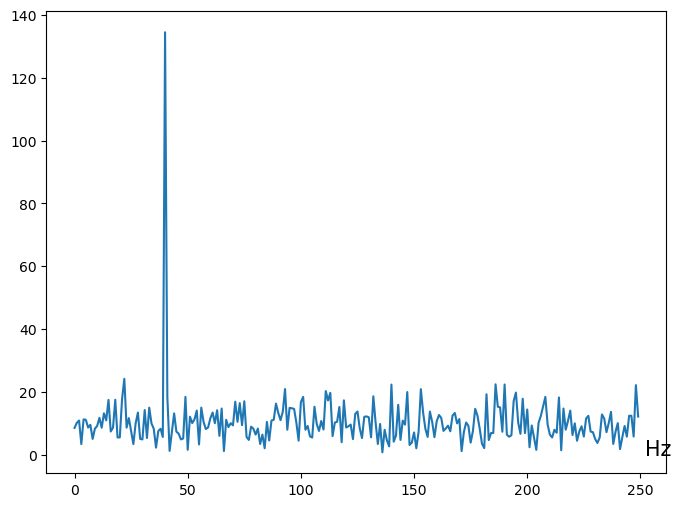

In [284]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

The plot shows magnitude values from 0 to 250 Hz (we sampled at 500 Hz, so we plot only to the
Nyquist Frequency = 250 Hz). Rerun the code below several times to see how the values change with
each new sample of random noise.

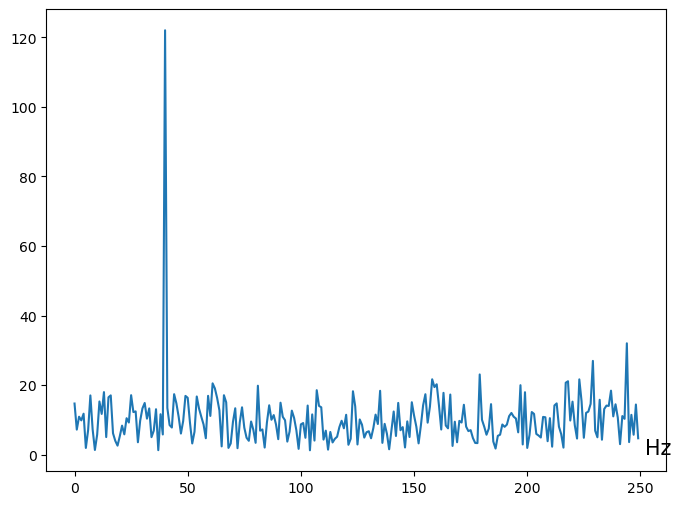

In [285]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5, len(time))
timeseries =0.5 * np.sin(2*np.pi * freq * time) + noise


make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

There is always a 40 Hz spike, and the measure of 40 Hz activity is distinctly different from all other
magnitude measures. This is fairly strong qualitative evidence that our estimate of 40 Hz activity is a
true measure of 40 Hz activity. 

### <font color=red>DSP.05.T4.f) Judging Real Activity from Background Noise</font>

Create the same 40 Hz timeseries with a gain of 0.01. Remember, this was the gain setting for which it was not clear if our estimate was correct.

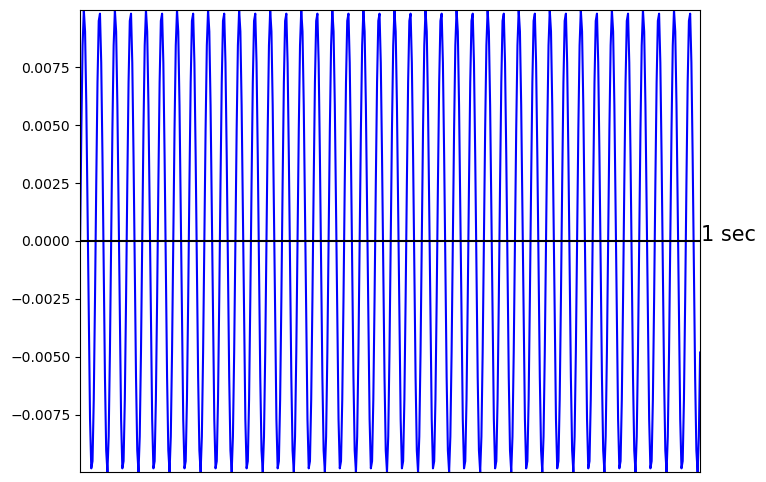

In [286]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 0.01 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

The signal strength is decreased by 99%.

Add random noise.

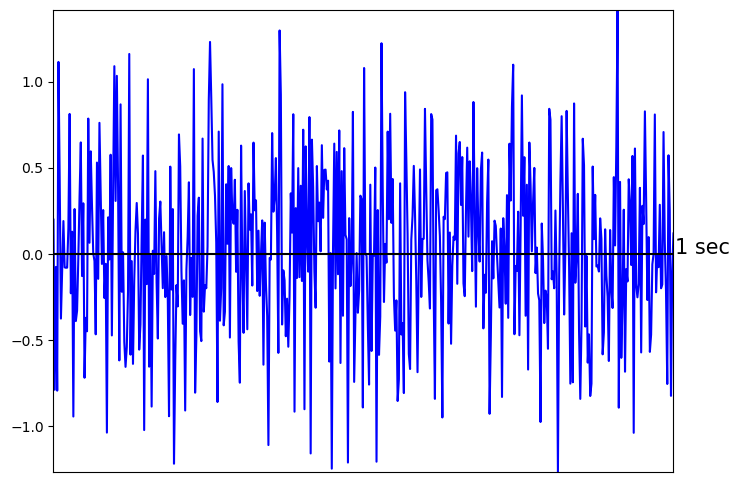

In [287]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries =0.01 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 40 Hz activity.

In [288]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 40j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.05261938806181615

In [289]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

58.36

The magnitude is probably close to the correct value (depending on the random noise added in a given run of the code), but is it a measure of the true 40 Hz signal?

Obtain an estimate of the magnitude value for all other frequencies.

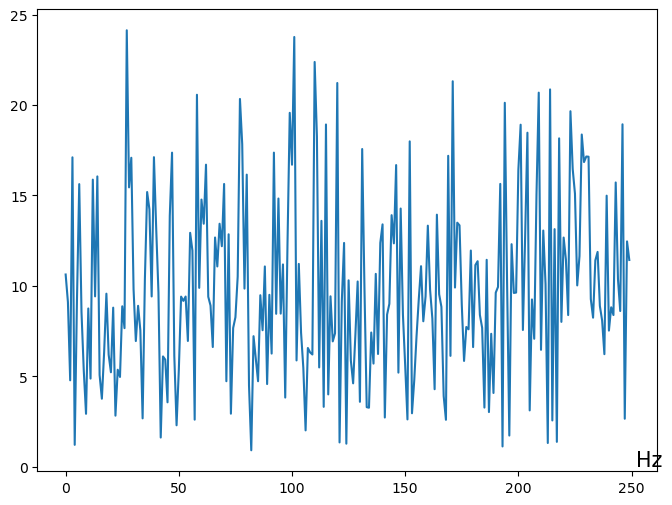

In [290]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

The plot shows magnitude values from 0 to 250 Hz (the sampling rate is 500 Hz, so we plot only to the
Nyquist Frequency = 250 Hz). Rerun the code below to see how the magnitude values change with each
new sample of random noise. Each time you run the code there are several dominate spikes and the
dominate spikes move for each new sample.

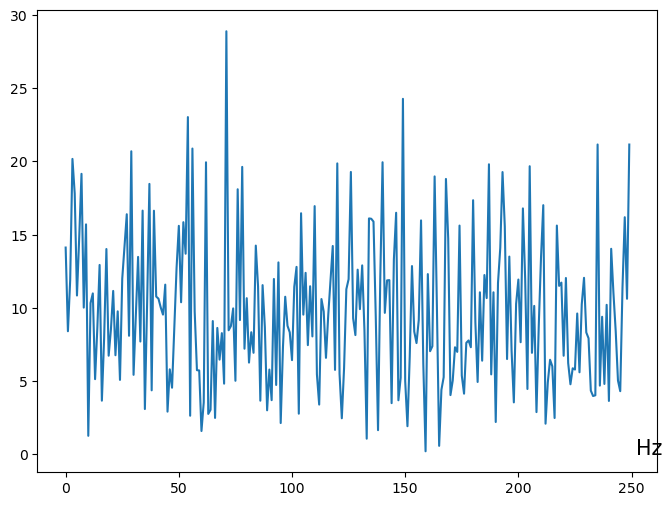

In [291]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5, len(time))
timeseries =0.01 * np.sin(2*np.pi * freq * time) + noise


make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

 The 40 Hz magnitude measure is not distinctly different from magnitude measures at other frequencies.
This is fairly strong evidence that our estimate of 40 Hz activity is not reliable - it is largely a measure
of background noise.

Change the gain value of the 40 Hz sine wave and rerun the code. 

At what gain value do you think it is possible to differentiate 40 Hz activity from background noise?

### <font color=red>DSP.05.T4.g) Judging Real Activity from Background Noise</font>

Create the same 40 Hz timeseries with the gain of 0.0001. (We’re really stacking the deck against
ourselves!)

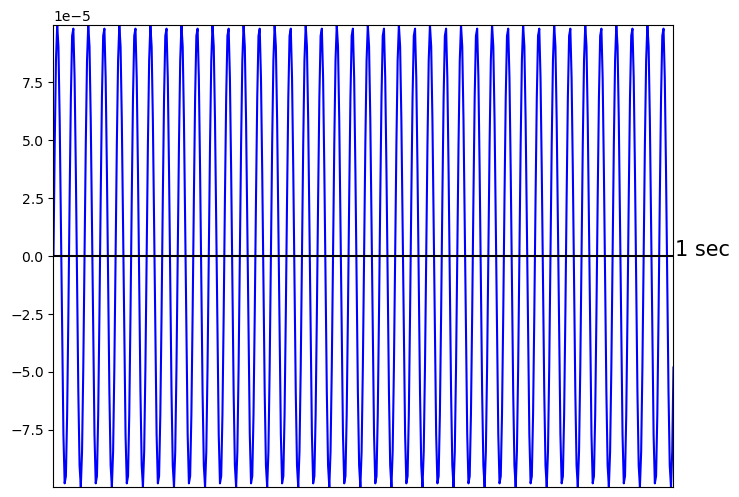

In [292]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries = 0.0001 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

So far, even that very, very small signal looks very good. But it's just a single frequency, without noise. The very clean sinusoidal pattern is evident no matter how small the signal is. Next, add random noise to the 40 Hz signal (over a 1-second interval, a sample is collected every 0.002 seconds = 1/500).

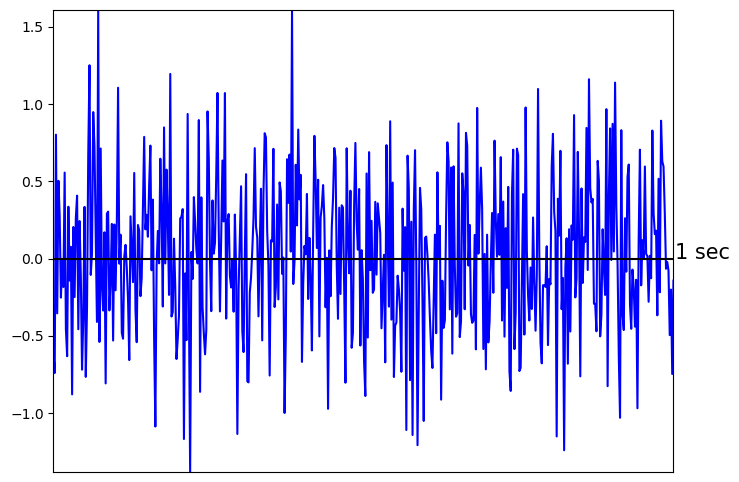

In [293]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries =0.0001 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show() 

Calculate the magnitude of 40 Hz activity.

In [294]:
x =np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 40j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.04654202402130788

In [295]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-33.08

The output of the 'abs' function tells us that the magnitude of 40 Hz activity is somewhat close to the correct value. 

Obtain a magnitude estimate for all other frequencies.

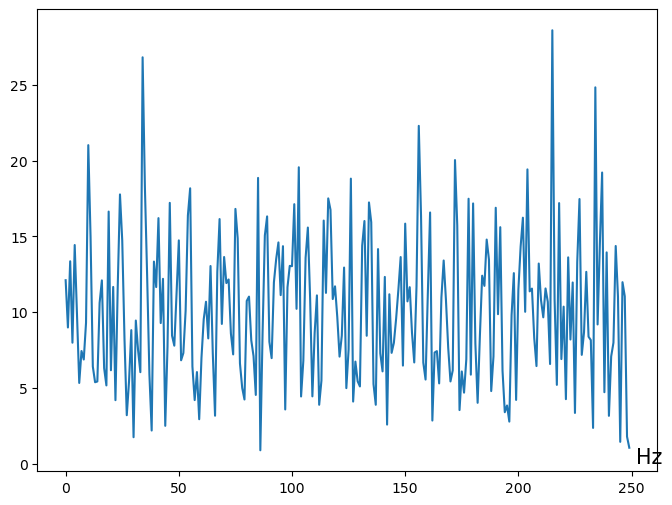

In [296]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

The plot shows magnitude values from 0 to 250 Hz (the sampling rate is 500 Hz, so we plot only to the
Nyquist Frequency = 250 Hz). Rerun the code below to see how the magnitude values change with each
new sample of random noise. Each time you run the code there are several dominate spikes, and the
dominate spikes move for each new sample. 

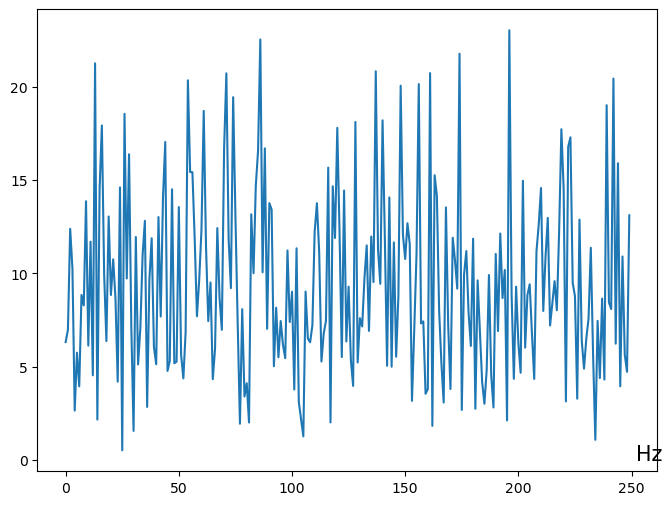

In [297]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5, len(time))
timeseries = 0.0001 * np.sin(2*np.pi * freq * time) + noise


make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

In this example, the measure of activity at 40 Hz is similar to what is observed at other frequencies. This is moderately strong qualitative evidence that our estimate of 40 Hz activity is reliable. Is there a way to more formally assess whether the 40 Hz magnitude measure is significantly different from magnitude measures of background activity?

Answer: There are several options.

One possibility is to obtain obtain several samples of the phenomena of interest, obtaining measures of the mean and variance of the magnitude measures (across samples), and then across samples examine where in this distribution the 40 Hz magnitude values fall. If the 40 Hz estimates fall at the tails of the distribution (in particular where magnitude values are large and so on the right side of the distribution), it is likely that the 40 Hz measure validly differs from the background measures.

Using the same gain, obtain the magnitude values from 0 to 250 Hz.

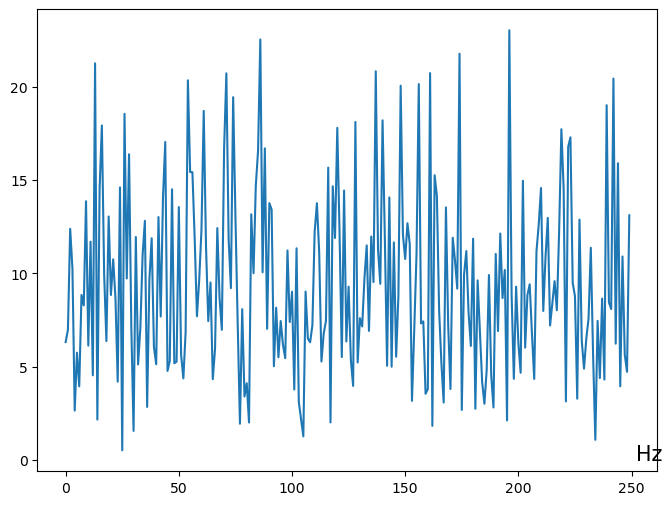

In [298]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

To compute a mean and variance, select several magnitude values between 0 and 250 Hz (say 50 different frequencies) to obtain a sample of the magnitude values. From this sample, calculate the mean. Repeat this process for many difference signal + noise samples, each time selecting a new set of 50 magnitude values and then computing the mean.

Here is how to accomplish the above. Below are the magnitude values from 0 to 250 Hz.

In [299]:
N = 500
Nhalf = math.ceil(N/2)
yf = fft(timeseries)    
yf = yf[0:Nhalf]
allmagnitude = np.abs(yf)
allmagnitude

array([ 6.32148762,  6.9785401 , 12.39251257, 10.2543814 ,  2.64398079,
        5.75026026,  3.9447279 ,  8.8424158 ,  8.2853413 , 13.8725794 ,
        6.12600439, 11.70399674,  4.53704902, 21.26956767,  2.16080528,
       14.55907739, 17.93714233,  9.9897402 ,  6.37072151, 13.0551632 ,
        8.84183278, 10.75898294,  8.67120029,  4.19506437, 14.61646684,
        0.51547898, 18.56022714,  9.72937348, 16.39231092,  7.18494723,
        1.5540451 , 11.95589927,  5.1202969 ,  7.06774329, 10.99613626,
       12.82322862,  2.84085329,  9.70237966, 11.88845845,  6.05850007,
        5.12833748, 13.02671267,  7.68820051, 14.08995119, 17.05272065,
        4.77179741,  5.30093619, 14.51495564,  5.1853545 ,  5.26487141,
       13.56060552,  5.63321358,  4.37193092,  6.85751859, 20.3599497 ,
       15.43759278, 15.42996903, 11.87133692,  7.70044273,  9.6660416 ,
       12.337015  , 18.71919612, 11.48148048,  7.44455814,  9.51562909,
        4.32900879,  5.97213631, 12.43196728,  8.65501895,  6.97

Randomly select 50 of the above magnitude values and calculate the mean. 

Repeat this process 1000 times, thus creating 1000 unique 40 Hz times series with a gain of 0.0001 plus noise, and each time randomly selecting 50 magnitude values and computing the mean.

In [300]:
magnitudemeans = np.zeros(1000)
for x in range(0,999):
    magnitudemeans[x] = np.mean(np.random.choice(allmagnitude, 50, replace=False))

Here are some of the 1000 mean values.

In [301]:
np.random.choice(magnitudemeans, 5, replace=False)

array([ 9.68404185, 10.1195344 ,  9.68082994, 10.17483958,  9.32403217])

Calculate the mean and standard deviation for this distribution.

In [302]:
distmean = np.mean(magnitudemeans)
distmean

9.432494334383462

In [303]:
distdev = np.std(magnitudemeans)
distdev

0.6751806053758396

Use the 'noise' magnitude mean and standard deviation values to plot a normal distribution.

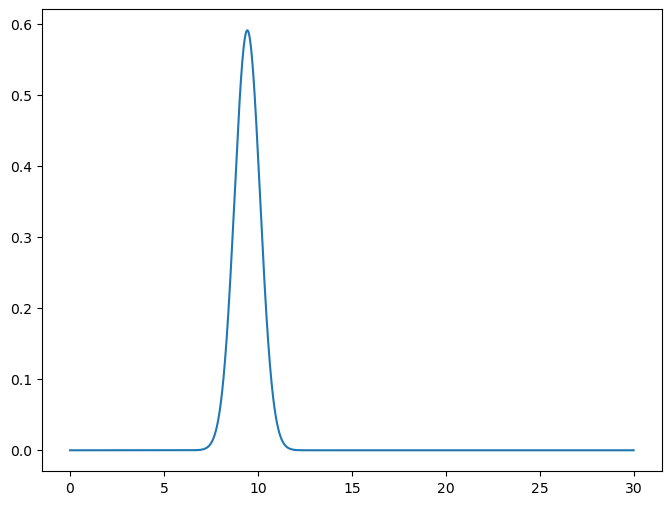

In [304]:
from scipy.stats import norm

#x-axis ranges from 10 and 30 with .01 steps
x = np.arange(0, 30, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))


We want to determine whether we are accurately estimating the magnitude of 40 Hz activity. 
Obtain 1000 estimates of the magnitude of 40 Hz activity. 

In [306]:
time = np.arange(0,1, 1/500)
freq = 40
N = 500
Nhalf = math.ceil(N/2)

fortyActivities = np.zeros(1000)
for x in range(0,1000): 
    noise = np.random.normal(0,0.5,len(time))
    timeseries = 0.0001 * np.sin(2*np.pi * freq * time) + noise
    yf = fft(timeseries)    
    yf = yf[0:Nhalf]
    allmagnitude = np.abs(yf)
    fortyActivities[x] = allmagnitude[40]   


Compute the 40 Hz magnitude mean and standard deviation values.

In [307]:
fourtymean = np.mean(fortyActivities)
fourtymean

10.030834658172358

In [308]:
fourtystd = np.std(fortyActivities)
fourtystd

4.950632161581644

Place these points on the normal distrubtion plot we created above.

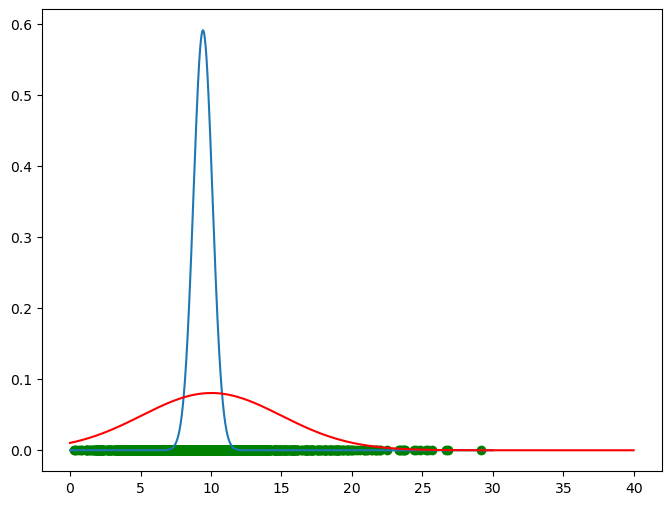

In [309]:
from scipy.stats import norm

#x-axis ranges from 10 and 30 with .01 steps
x = np.arange(0, 30, 0.01)
y = np.arange(0, 40, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))
plt.plot(y, norm.pdf(y, fourtymean, fourtystd),'r')
plt.scatter(fortyActivities, np.zeros(1000), c ="g")

The above plot shows two normal distribution curves. (Remember that a the normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is defined by the standard deviation.)

The red line shows the distribution of 40 Hz magnitude values. The green dots show the 1000 magnitude estimates of 40 Hz activity. For most of the 40 Hz estimates, the 40 Hz measure falls at the center of the noise distribution (demonstrated by the peak of the red line). This is somewhat strong quantitative evidence that the 40 Hz magnitude measure is not different from the other magnitude measures (i.e., likely noise).

Outside the scope of this courseware, but if you have some knowledge of statistics, then you know we can use the noise and 40 Hz mean and standard deviation values to compute a t-test to quantify the similarity of the noise and 40 Hz magnitude distributions. 

### <font color=red>DSP.05.T4.h) Judging Real Activity from Background Noise</font>

Create the same 40 Hz timeseries with a gain of 0.10. (Here we have a much better chance of correctly estimating the magnitude of 40 Hz activity.)

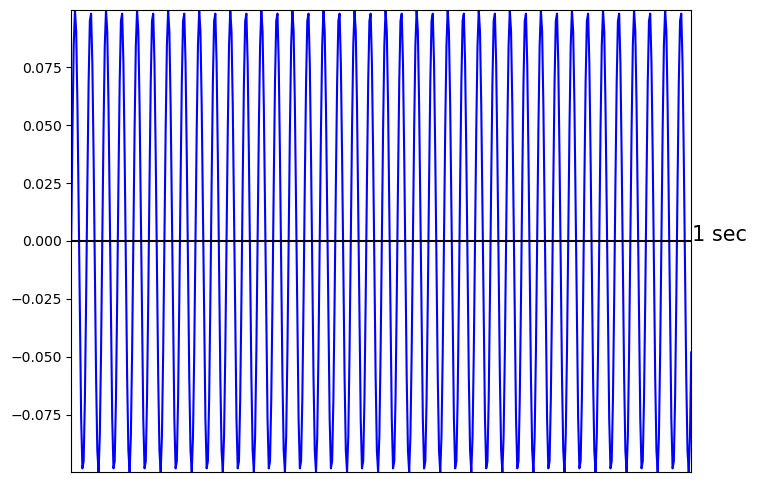

In [310]:
time = np.arange(0,1, 1/500)
freq = 40
timeseries =0.10 * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Add random noise to the 40 Hz signal (over a 1-second interval a sample is collected every 0.002 seconds
= 1/500).

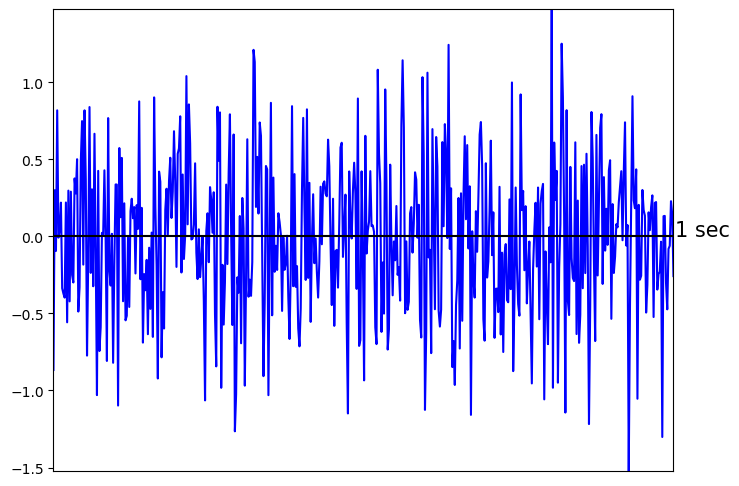

In [311]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries =0.10 * np.sin(2*np.pi * freq * time) + noise
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show() 

Calculate the magnitude of 40 Hz activity.

In [312]:
x = np.arange(0,1, 1/500)
complex_amplitude = np.exp(2*np.pi * 40j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
abs(spectrum)

0.1196608540835306

In [313]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

-40.93

Obtain magnitude measures for all other frequencies.

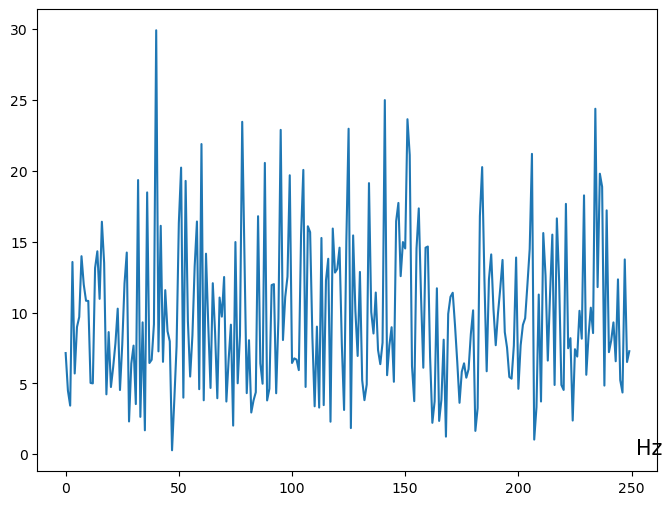

In [314]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

The plot shows magnitude values from 0 to 250 Hz (the sampling rate is 500 Hz, so we plot only to the
Nyquist Frequency = 250 Hz). Rerun the code below to see how the magnitude values change with each
new sample of random noise. Each time you run the code, there are several dominate spikes, and the
dominate spikes move for each new sample. 

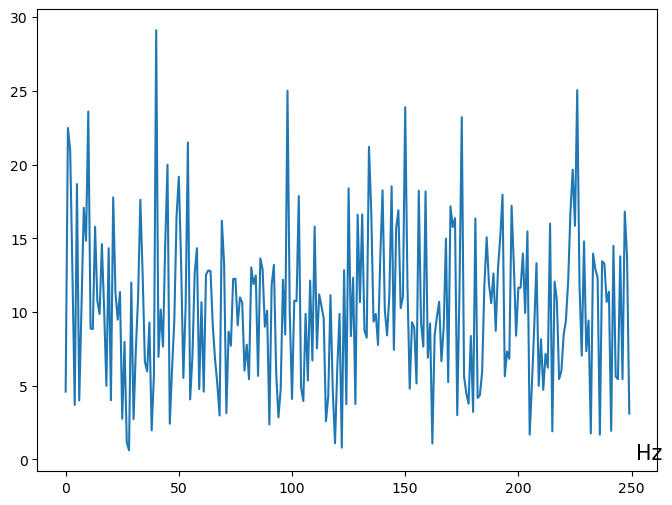

In [315]:
time = np.arange(0,1, 1/500)
freq = 40
noise = np.random.normal(0,0.5, len(time))
timeseries = 0.10 * np.sin(2*np.pi * freq * time) + noise


make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

Is there a way to quantitatively examine whether the 40 Hz magnitude measure is significantly different
from the background magnitude measures?

Answer: Again, one possibility is to obtain measures of the mean and variance of the magnitude measures and
then examine where in this distribution the 40 Hz magnitude measure falls. If the 40 Hz estimate falls at
the tails of the distribution it is likely that the 40 Hz measure differs significantly from the background
measures.

Using the same gain, obtain the magnitude values from 0 to 250 Hz.

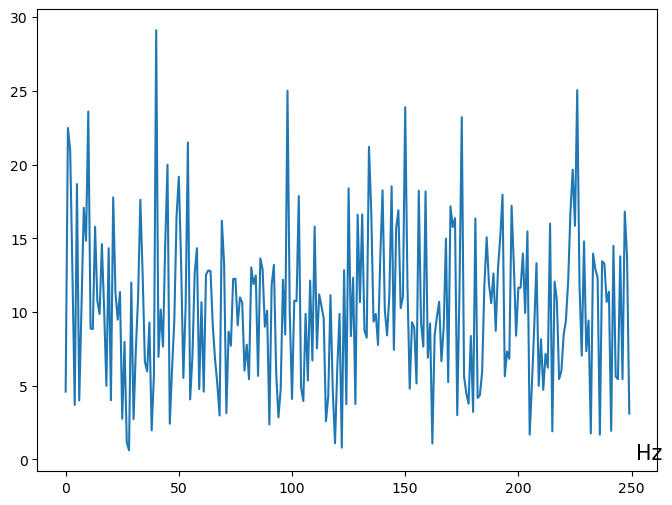

In [316]:
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

Randomly select 50 of the above magnitude values and calculate the mean. 

Repeat this process 1000 times, thus creating 1000 unique 40 Hz times series with a gain of 0.10 plus noise, and each time randomly selecting 50 magnitude values and computing the mean.

In [317]:
magnitudemeans = np.zeros(1000)
for x in range(0,999):
    magnitudemeans[x] = np.mean(np.random.choice(allmagnitude, 50, replace=False))

Here are some of the 1000 mean values.

In [318]:
np.random.choice(magnitudemeans, 5, replace=False)

array([9.88272028, 9.68600926, 9.58267523, 9.37616075, 9.21992281])

Calculate the mean and standard deviation of this distribution.

In [319]:
distmean = np.mean(magnitudemeans)
distmean

9.395287714529328

In [320]:
distdev = np.std(magnitudemeans)
distdev

0.7182342959309888

Use the above magnitude values to create a normal distribution.

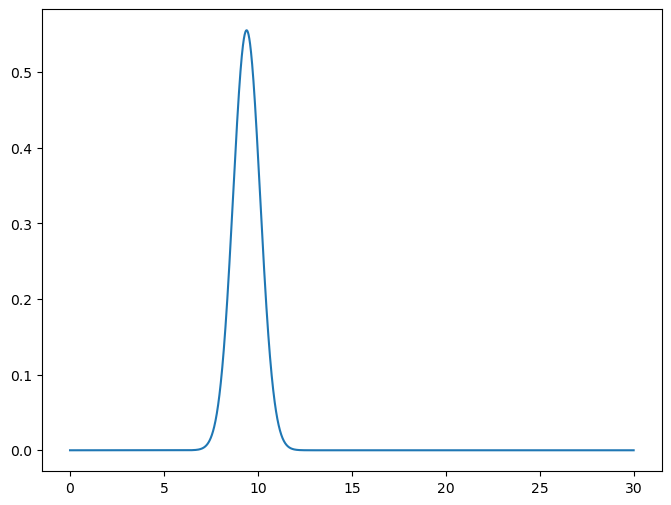

In [321]:
from scipy.stats import norm

#x-axis ranges from 10 and 30 with .01 steps
x = np.arange(0, 30, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))

We want to determine if we are accurately estimating the magnitude of 40 Hz activity. 
Obtain 1000 estimates of the magnitude of 40 Hz activity. 

In [322]:
time = np.arange(0,1, 1/500)
freq = 40
N = 500
Nhalf = math.ceil(N/2)

fortyActivities = np.zeros(1000)
for x in range(0,1000): 
    noise = np.random.normal(0,0.5,len(time))
    timeseries = 0.10 * np.sin(2*np.pi * freq * time) + noise
    yf = fft(timeseries)    
    yf = yf[0:Nhalf]
    allmagnitude = np.abs(yf)
    fortyActivities[x] = allmagnitude[40]   


Compute the mean and standard deviation.

In [323]:
fourtymean = np.mean(fortyActivities)
fourtymean

26.281401565300534

In [324]:
fourtystd = np.std(fortyActivities)
fourtystd

7.497251819179289

Place these points on the normal distrubtion plot we created above.

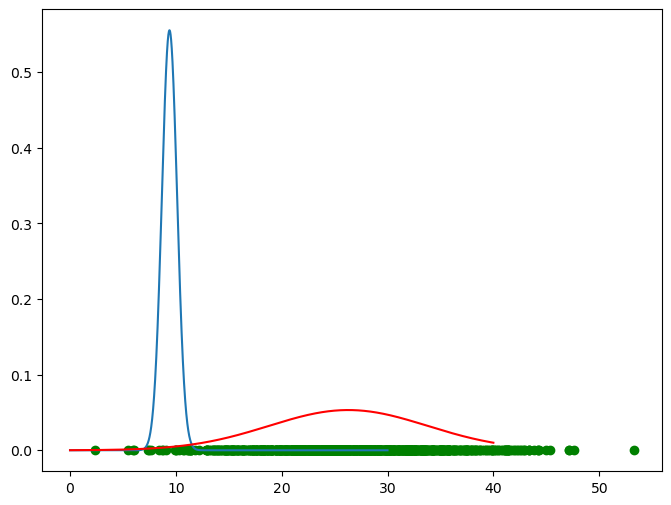

In [325]:
from scipy.stats import norm

#x-axis ranges from 10 and 30 with .01 steps
x = np.arange(0, 30, 0.01)
y = np.arange(0, 40, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))
plt.plot(y, norm.pdf(y, fourtymean, fourtystd),'r')
plt.scatter(fortyActivities, np.zeros(1000), c ="g")

For most of the estimates, the 40 Hz measure falls at the high end of the noise distribution. This is somewhat strong quantitative evidence that the 40 Hz magnitude measure is different from the other magnitude measures (i.e., likely not noise). 